# AlphaFactor Research 01

# Introduction

In [1]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime
import alphalens
import pyfolio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
Prices = pickle.load(open('Prices.pkl', 'rb')) #/content/drive/My Drive/Projects/trading/

In [27]:
train_start = datetime(2015, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [28]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high     low    open   close     volume    adj_close
Date                                                              
2015-01-01  7710.0  7710.0  7710.0  7710.0        0.0  6203.339844
2015-01-02  7795.0  7600.0  7651.0  7625.0   613354.0  6134.950684
2015-01-05  7650.0  7301.0  7583.0  7340.0  1472081.0  5905.644043
2015-01-06  7641.0  7354.0  7354.0  7621.0  1173591.0  6131.731934
2015-01-07  7750.0  7451.0  7515.0  7750.0  2275334.0  6235.523438

# Data cleaning and validation

In [29]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open   close   volume    adj_close
Date                                                            
2017-01-10  3489.0  3430.0  3475.0  3445.0  69398.0  3444.051270
2017-01-11  3465.0  3445.0  3455.0  3466.0   6426.0  3465.045410
2017-01-12  3440.0  3370.0  3440.0  3363.0  64075.0  3362.073730
2017-01-13  3400.0  3390.0  3390.0  3386.0  21058.0  3385.067383
2017-01-16  3419.0  3380.0  3395.0  3400.0   7148.0  3399.063477
2017-01-17  3385.0  3355.0  3380.0  3358.0  10926.0  3357.075195
2017-01-18  3415.0  3395.0  3395.0  3400.0   7366.0  3399.063477
2017-01-19  3405.0  3405.0  3405.0  3405.0  24398.0  3404.062188
2017-01-20  3370.0  3350.0  3370.0  3365.0   8243.0  3364.073242

In [30]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [31]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.218750  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.640625  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.890625  
2017-06-21  182357.875000  
2017-06-22  186854.375000  
2017-06-23  189852.015625  
2017-06-26  189852.015625  
2017-06-27  193848.890625  
2017-06-28  194148.703125  
2017-06-29  195847.359375  
2017-06-30  199944.171875

In [32]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.218750
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.640625
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [33]:
macd = ta.trend.MACD(whl['close'], n_slow = 26, n_fast = 12, n_sign = 9)

ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = macd.macd()
whl['macd_signal']  = macd.macd_signal()
whl['macd_diff'] = macd.macd_diff()


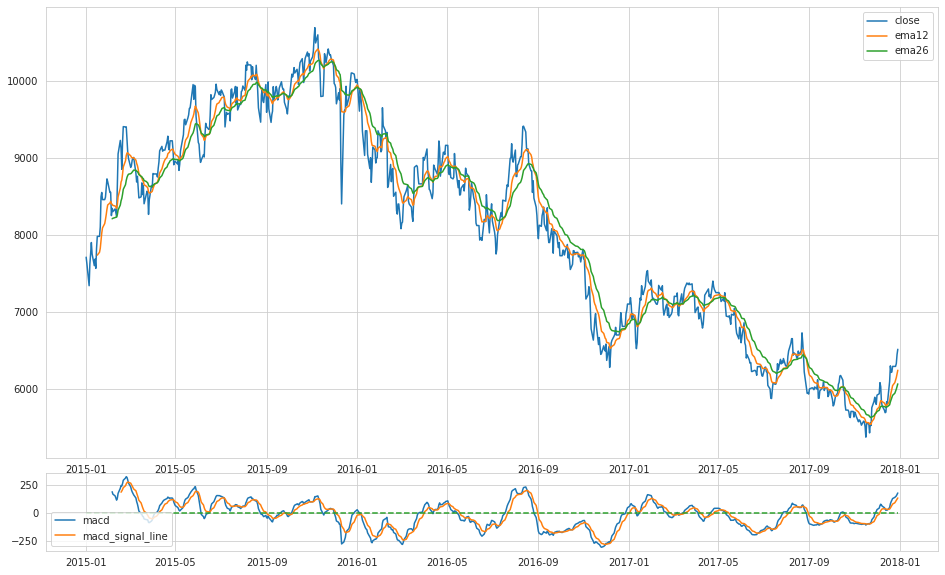

In [34]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [35]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 0:
        data = data.copy()
        close = data['close']
        
        Macd = ta.trend.MACD(close, n_slow = 26, n_fast = 12, n_sign = 9)
        macd = Macd.macd()
        macd_signal = Macd.macd_signal()
        macd_diff = Macd.macd_diff() * -1

        out = pd.DataFrame(macd_diff)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [36]:
macd_data

MACD_diff_12_26
Date       symbol                  
2017-10-19 4SI.JO               NaN
2017-10-20 4SI.JO               NaN
2017-10-23 4SI.JO               NaN
2017-10-24 4SI.JO               NaN
2017-10-25 4SI.JO               NaN
...                             ...
2017-12-25 ZPLP.JO       -53.718039
2017-12-26 ZPLP.JO       -47.688752
2017-12-27 ZPLP.JO       -40.354182
2017-12-28 ZPLP.JO       -32.111094
2017-12-29 ZPLP.JO       -23.848948

[249904 rows x 1 columns]

In [37]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [38]:
prices_data.index = pd.to_datetime(prices_data.index)

In [39]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                              
2015-02-17 ABG.JO     0.020861  0.034446  0.022586  94.739168                3
           ABSP.JO   -0.008917 -0.031847 -0.025478  93.634103                3
           ACE.JO     0.000000 -0.153846  0.000000  -1.897642                1
           ACG.JO     0.002985 -0.004975  0.018905  21.486675                3
           ACL.JO     0.000000  0.005385  0.007692  -9.489539                1
...                        ...       ...       ...        ...              ...
2017-12-22 WSL.JO     0.000000  0.000000  0.012121   0.353278                3
           YRK.JO     0.000000  0.000000 -0.044444  -1.657683                2
           YYLBEE.JO  0.000000  0.000000  0.000728 -13.264181                1
           ZED.JO     0.000000  0.000000  0.028316  -5.564819                2
           ZPLP.JO    0.000000  0.000000 -0.002346 -57.537588                1

[236257 rows x 5 columns]

In [40]:
from alphalens import performance as perf
from alphalens import utils, plotting

In [41]:
mean_quant_ret, std_quantile = \
    perf.mean_return_by_quantile(factor_data,
                                 by_group = False,
                                 demeaned = True,
                                 group_adjust = False)

mean_quant_rateret = \
        mean_quant_ret.apply(utils.rate_of_return, axis=0,base_period = mean_quant_ret.columns[0])

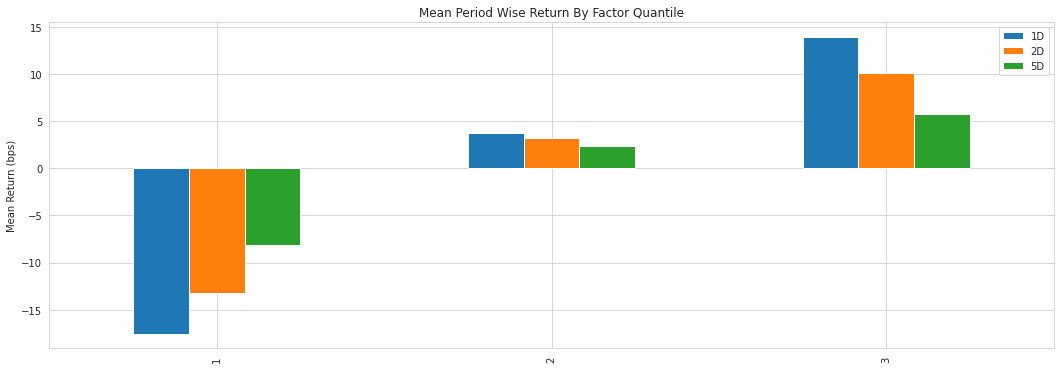

In [42]:
plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = False,
                                   ylim_percentiles = None)
plt.show()

In [43]:
factor_returns = perf.factor_returns(factor_data[factor_data['factor_quantile'].isin([1, 3])], demeaned = True)

mean_quant_ret_bydate, std_quant_daily = \
        perf.mean_return_by_quantile(factor_data,
                                     by_date = True,
                                     by_group = False,
                                     demeaned = True,
                                     group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

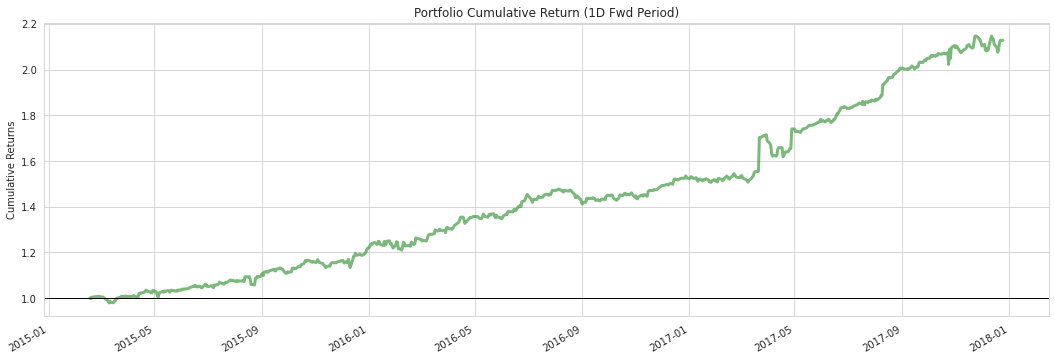

In [44]:
fig = plt.figure(figsize = (16, 8))
p = '1D'
title = 'Factor weighted LONG/SHORT portfolio cumulative returns'
plotting.plot_cumulative_returns(factor_returns[p],
                                         period = p)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

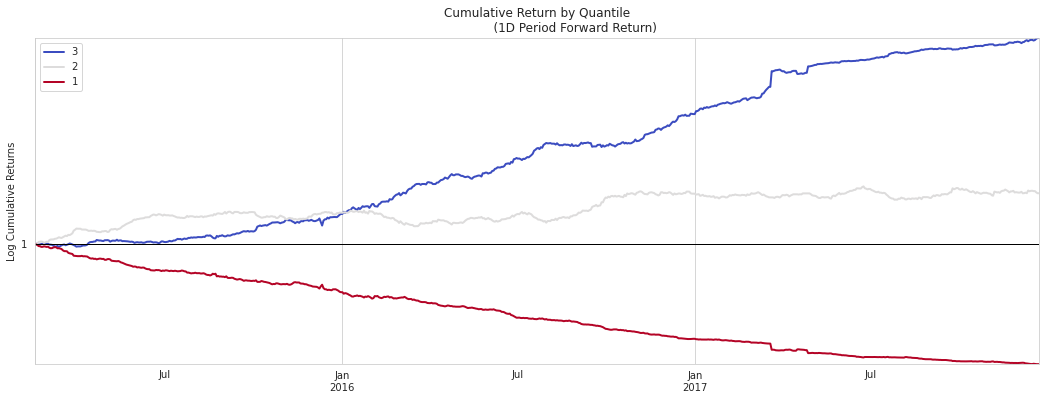

In [45]:
fig = plt.figure(figsize = (16, 8))
cumulative_quantile_returns = mean_quant_ret_bydate.groupby(level = ['factor_quantile', 'date']).sum()[p]
plotting.plot_cumulative_returns_by_quantile(cumulative_quantile_returns,
                                             period = p)
plt.show()

In [46]:
pyfolio_input = alphalens.performance.create_pyfolio_input(factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [47]:
returns = pyfolio_input[0]
returns

date
2015-02-17    0.000000
2015-02-18   -0.002626
2015-02-19    0.006051
2015-02-20    0.000316
2015-02-21    0.000000
                ...   
2017-12-21    0.015364
2017-12-22    0.004756
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000004
Freq: D, Length: 1043, dtype: float64

In [48]:
positions = pyfolio_input[1]
positions

asset          4SI.JO        ABG.JO       ABSP.JO       ACE.JO       ACG.JO  \
date                                                                          
2015-02-17    0.00000  14078.408130  13904.833059 -1100.551816  2572.475232   
2015-02-18    0.00000   7101.564682  16986.490400 -1790.455615  1293.293929   
2015-02-19    0.00000   1947.208780  33693.738847     0.000000   976.667364   
2015-02-20    0.00000    596.738252  39663.546516     0.000000   846.435606   
2015-02-21    0.00000      0.000000      0.000000     0.000000     0.000000   
...               ...           ...           ...          ...          ...   
2017-12-21  606.92931 -30816.441887 -21051.303122     0.000000     0.000000   
2017-12-22    0.00000 -24442.244819 -24801.296295     0.000000     0.000000   
2017-12-23    0.00000      0.000000      0.000000     0.000000     0.000000   
2017-12-24    0.00000      0.000000      0.000000     0.000000     0.000000   
2017-12-25    0.00000      0.000000      0.000000     0.000000     0.000000   

asset            ACL.JO       ACS.JO       ACT.JO       ADH.JO       ADI.JO  \
date                                                                          
2015-02-17 -2293.027952 -1231.502805     0.000000 -1253.199420 -1552.196346   
2015-02-18 -2614.911468 -1904.318973     0.000000 -1889.687891 -2050.984698   
2015-02-19 -2717.516622     0.000000     0.000000 -2040.238325 -2283.796771   
2015-02-20 -2557.452959     0.000000     0.000000     0.000000 -2270.976464   
2015-02-21     0.000000     0.000000     0.000000     0.000000     0.000000   
...                 ...          ...          ...          ...          ...   
2017-12-21  1260.111636 -1003.956173     0.000000 -2713.184951  -414.756165   
2017-12-22  2307.032843   -32.091683  1752.529319 -2130.390125     0.000000   
2017-12-23     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-24     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-25     0.000000     0.000000     0.000000     0.000000     0.000000   

asset       ...  VLE.JO        VOD.JO  WEA.JO        WHL.JO       WSL.JO  \
date        ...                                                            
2015-02-17  ...     0.0  -1744.071724     0.0 -10230.847939     0.000000   
2015-02-18  ...     0.0  -2477.946264     0.0  -7346.702868 -1714.084642   
2015-02-19  ...     0.0  -2876.176350     0.0  -8430.639609     0.000000   
2015-02-20  ...     0.0  -2484.957275     0.0 -10195.941087 -1920.340483   
2015-02-21  ...     0.0      0.000000     0.0      0.000000     0.000000   
...         ...     ...           ...     ...           ...          ...   
2017-12-21  ...     0.0 -13065.263817     0.0  -6344.476400   619.055380   
2017-12-22  ...     0.0  -8732.711643     0.0  -6600.107960  1740.985822   
2017-12-23  ...     0.0      0.000000     0.0      0.000000     0.000000   
2017-12-24  ...     0.0      0.000000     0.0      0.000000     0.000000   
2017-12-25  ...     0.0      0.000000     0.0      0.000000     0.000000   

asset            YRK.JO    YYLBEE.JO       ZED.JO      ZPLP.JO          cash  
date                                                                          
2015-02-17     0.000000     0.000000    -5.529300     0.000000  1.000000e+06  
2015-02-18     0.000000     0.000000  -930.691654     0.000000  9.973742e+05  
2015-02-19     0.000000     0.000000 -1200.046956     0.000000  1.003410e+06  
2015-02-20 -1981.755676     0.000000 -1174.661397     0.000000  1.003727e+06  
2015-02-21     0.000000     0.000000     0.000000     0.000000  1.003727e+06  
...                 ...          ...          ...          ...           ...  
2017-12-21     0.000000 -1695.112144     0.000000 -8015.018821  2.117672e+06  
2017-12-22     0.000000  -548.077018     0.000000 -7990.332560  2.127744e+06  
2017-12-23     0.000000     0.000000     0.000000     0.000000  2.127744e+06  
2017-12-24     0.000000     0.000000     0.000000     0.000000  2.127744e+06  
2017-12

In [49]:
benchmark = pyfolio_input[2]
benchmark

date
2015-02-17    0.000000
2015-02-18   -0.003950
2015-02-19   -0.000143
2015-02-20    0.010883
2015-02-21    0.000000
                ...   
2017-12-21    0.002517
2017-12-22    0.003760
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000002
Freq: D, Name: benchmark, Length: 1043, dtype: float64

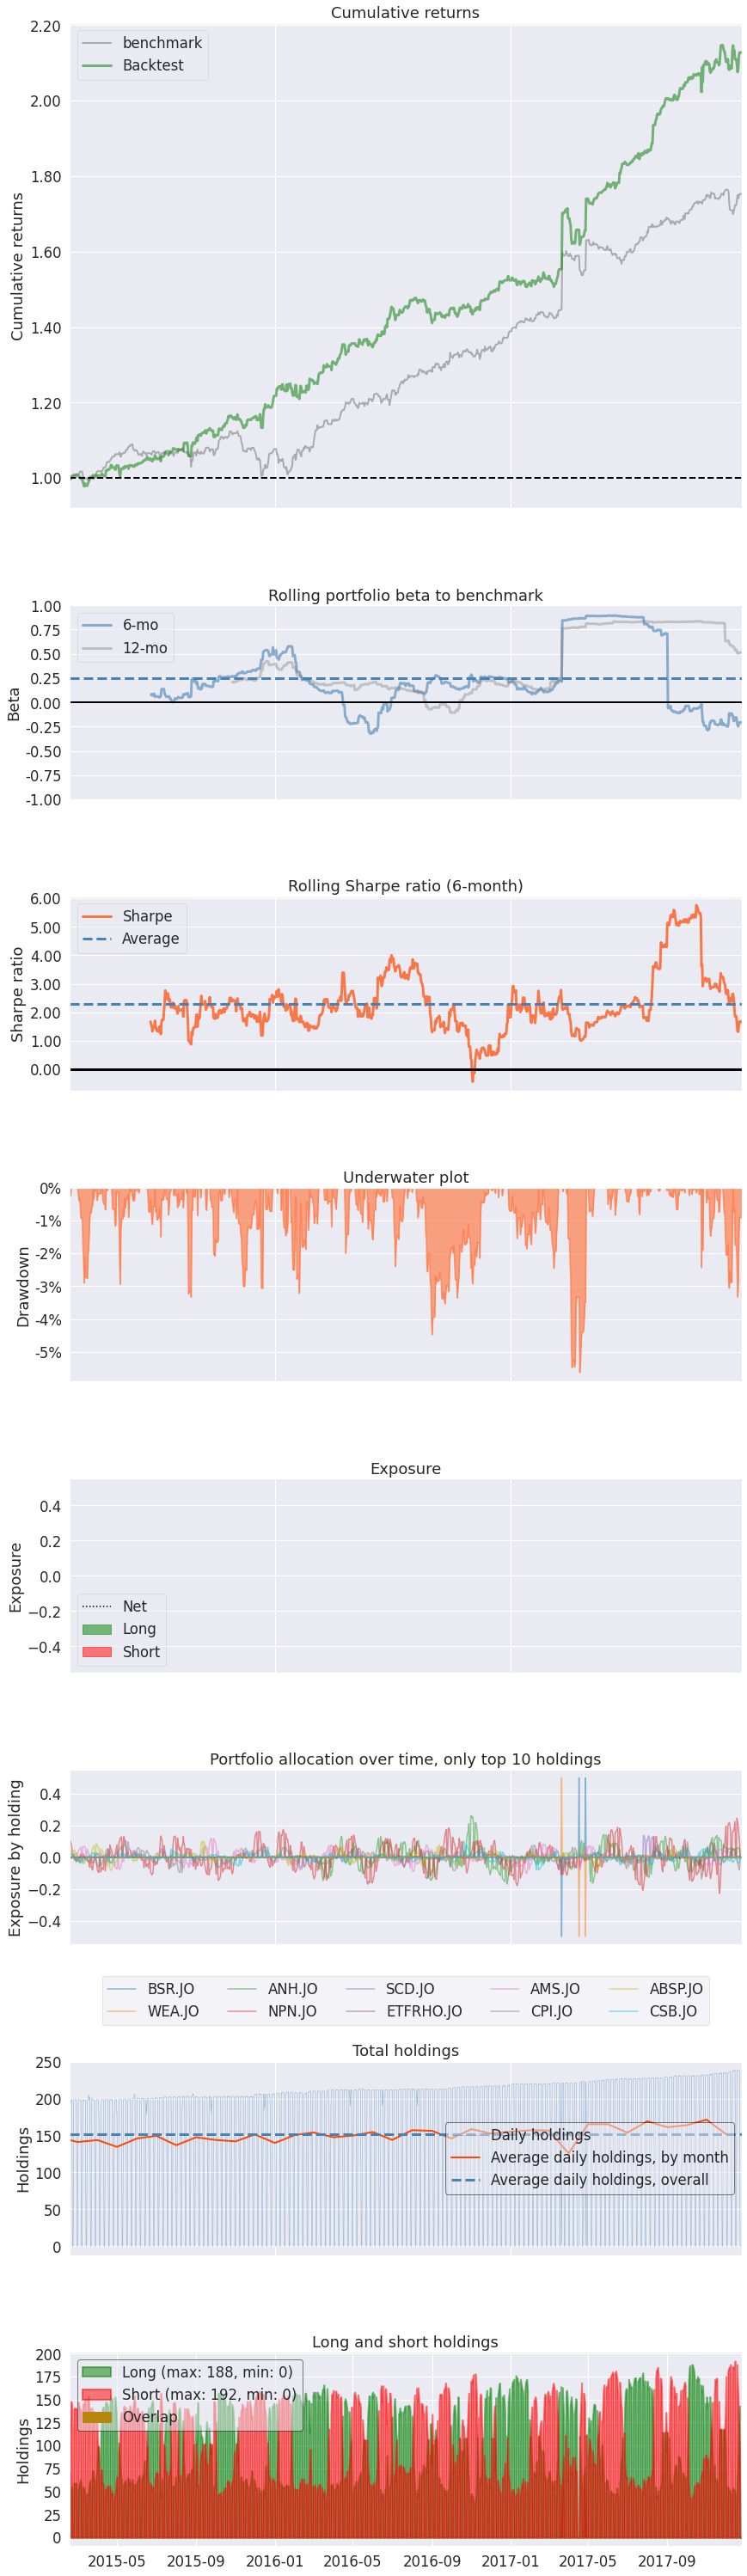

In [50]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

# A Quantamental Approach

In [51]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Universe Selection

In [77]:
QTradeableStocks_median_dollar_volume = 2500000
exchange_rate = 16.56
minimum_dollar_volume = QTradeableStocks_median_dollar_volume * exchange_rate
minimum_dollar_volume

41400000.0

In [53]:
%time
dollar_volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 200:
        data = data.copy()
        close = data['close']
        volume = data['volume']
        
        dollar_volume = volume.mul(close)
        trailing_dollar_volume = dollar_volume.rolling(window = 200).median()

        trailing_dollar_volume.name = 'trailing_dollar_volume'
        out = pd.DataFrame(trailing_dollar_volume)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index()#.set_index(['Date', 'symbol'])

        dollar_volume_data = pd.concat([dollar_volume_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


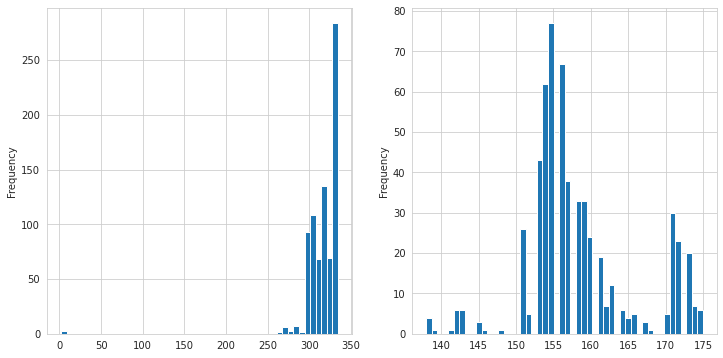

In [54]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

dollar_volume_data\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

dollar_volume_data[dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume]\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [55]:
dollar_volume_data = dollar_volume_data.set_index(['Date', 'symbol'])
dollar_volume_data['group'] = np.where(dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume, 'Tradeable', 'Non-tradeable')
dollar_volume_data

trailing_dollar_volume          group
Date       symbol                                        
2015-01-01 ABG.JO                      NaN  Non-tradeable
2015-01-02 ABG.JO                      NaN  Non-tradeable
2015-01-05 ABG.JO                      NaN  Non-tradeable
2015-01-06 ABG.JO                      NaN  Non-tradeable
2015-01-07 ABG.JO                      NaN  Non-tradeable
...                                    ...            ...
2017-12-25 ZPLP.JO              16254855.0  Non-tradeable
2017-12-26 ZPLP.JO              16254855.0  Non-tradeable
2017-12-27 ZPLP.JO              16254855.0  Non-tradeable
2017-12-28 ZPLP.JO              16094445.0  Non-tradeable
2017-12-29 ZPLP.JO              16094445.0  Non-tradeable

[247308 rows x 2 columns]

In [56]:
(dollar_volume_data['group'].value_counts() / len(dollar_volume_data)).round(3) * 100

Non-tradeable    62.9
Tradeable        37.1
Name: group, dtype: float64

In [78]:
QTradeableStocks_minimun_price = 5
minimum_price = QTradeableStocks_minimun_price * exchange_rate
minimum_price

82.8

In [58]:
%time
price_filter_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 50:
        data = data.copy()
        close = data['close']
        
        prices = close

        prices.name = 'prices'
        out = pd.DataFrame(prices)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        price_filter_data = pd.concat([price_filter_data, out])
        # print(i, symbol)

price_filter_data

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


prices
Date       symbol         
2017-10-19 4SI.JO    235.0
2017-10-20 4SI.JO    250.0
2017-10-23 4SI.JO    269.0
2017-10-24 4SI.JO    285.0
2017-10-25 4SI.JO    285.0
...                    ...
2017-12-25 ZPLP.JO  6395.0
2017-12-26 ZPLP.JO  6395.0
2017-12-27 ZPLP.JO  6393.0
2017-12-28 ZPLP.JO  6385.0
2017-12-29 ZPLP.JO  6380.0

[249643 rows x 1 columns]

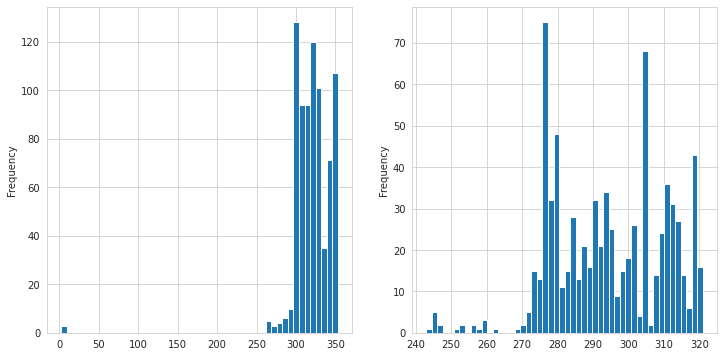

In [59]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

price_filter_data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = price_filter_data[price_filter_data['prices'] > minimum_price]
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [60]:
price_filter_data['group'] = np.where(price_filter_data['prices'] > minimum_price, 'Tradeable', 'Non-tradeable')
price_filter_data

prices      group
Date       symbol                    
2017-10-19 4SI.JO    235.0  Tradeable
2017-10-20 4SI.JO    250.0  Tradeable
2017-10-23 4SI.JO    269.0  Tradeable
2017-10-24 4SI.JO    285.0  Tradeable
2017-10-25 4SI.JO    285.0  Tradeable
...                    ...        ...
2017-12-25 ZPLP.JO  6395.0  Tradeable
2017-12-26 ZPLP.JO  6395.0  Tradeable
2017-12-27 ZPLP.JO  6393.0  Tradeable
2017-12-28 ZPLP.JO  6385.0  Tradeable
2017-12-29 ZPLP.JO  6380.0  Tradeable

[249643 rows x 2 columns]

In [61]:
(price_filter_data['group'].value_counts() / len(price_filter_data)).round(3) * 100

Tradeable        91.7
Non-tradeable     8.3
Name: group, dtype: float64

In [62]:
dollar_volume_data = dollar_volume_data.rename(columns = {'group':'filter1'})
price_filter_data = price_filter_data.rename(columns = {'group':'filter2'})
tradeable_universe = pd.concat([dollar_volume_data, price_filter_data], axis = 1)

tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2  
Date       symbol                    
2015-01-01 ABG.JO         Tradeable  
           ABSP.JO        Tradeable  
           ACE.JO     Non-tradeable  
           ACG.JO         Tradeable  
           ACL.JO         Tradeable  
...                             ...  
2017-12-29 WSL.JO         Tradeable  
           YRK.JO         Tradeable  
           YYLBEE.JO      Tradeable  
           ZED.JO         Tradeable  
           ZPLP.JO        Tradeable  

[249643 rows x 4 columns]

In [63]:
tradeable_universe['filter'] = np.where(tradeable_universe['filter1'] == tradeable_universe['filter2'], tradeable_universe['filter1'], 'Non-tradeable')
tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2         filter  
Date       symbol                                   
2015-01-01 ABG.JO         Tradeable  Non-tradeable  
           ABSP.JO        Tradeable  Non-tradeable  
           ACE.JO     Non-tradeable  Non-tradeable  
           ACG.JO         Tradeable  Non-tradeable  
           ACL.JO         Tradeable  Non-tradeable  
...                             ...            ...  
2017-12-29 WSL.JO         Tradeable  Non-tradeable  
           YRK.JO         Tradeable  Non-tradeable  
           YYLBEE.JO      Tradeable  Non-tradeable  
           ZED.JO         Tradeable      Tradeable  
           ZPLP.JO        Tradeable  Non-tradeable  

[249643 rows x 5 columns]

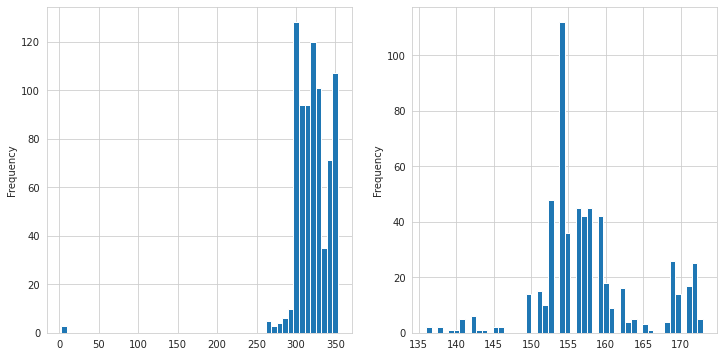

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

tradeable_universe.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = tradeable_universe[tradeable_universe['filter'] == 'Tradeable']
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [287]:
def getTrailingVolume(
    close, volume, symbol, n = trailing_volume_n):

    volume = data['volume']
    dollar_volume = volume.mul(close)

    trailing_dollar_volume = \
        dollar_volume.rolling(
            window = n).median()
    trailing_dollar_volume.name = \
        'trailing_dollar_volume'

    trailing_dollar_volume = \
        pd.DataFrame(trailing_dollar_volume)

    trailing_dollar_volume['symbol'] = symbol

    trailing_dollar_volume = \
        trailing_dollar_volume.\
        reset_index()\
        .set_index(['date', 'symbol'])

    return trailing_dollar_volume

def getPricing(close, symbol):
    prices = pd.DataFrame(close)
    prices['symbol'] = symbol
    prices = prices.reset_index()\
        .set_index(['date', 'symbol'])

    return prices

In [122]:
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() * -1
    return macd_diff

In [187]:
def percentB(open = None, high = None, low = None, close = None, volume = None,
             n = 20, ndev = 2):
    bbands = ta.volatility\
        .BollingerBands(close, n = n, ndev = ndev)
    upper = bbands.bollinger_hband()
    lower = bbands.bollinger_lband()

    perc_b = ((close - lower)/(upper - lower)) * -1
    perc_b.name = 'perc_b'
    perc_b
    return perc_b

In [188]:
def getIndicator(trainPrices,
                 indicator,
                 filter = 'QTradeable',
                 trailing_volume_n = 200, 
                 *args, **kwargs):


    factor_df = pd.DataFrame()
    for i, (symbol, data) in enumerate(trainPrices.items()):
        if len(data) > trailing_volume_n:
            data = data.copy()

            open = data['open']
            high = data['high']
            low = data['low']
            close = data['close']
            volume = data['volume']
            adj_close = data['adj_close']


            factor = indicator(
                open = open,
                high = high,
                low = low,
                close = close,
                volume = volume,
                *args, **kwargs
            )
            factor_name = factor.name

            out = pd.DataFrame(factor)
            out['symbol'] = symbol
            out.index.name = 'date'
            out = out.reset_index()\
                  .set_index(['date', 'symbol'])

            if filter == 'QTradeable':

                def getTrailingVolume(
                    close, volume, symbol, n = trailing_volume_n):

                    volume = data['volume']
                    dollar_volume = volume.mul(close)

                    trailing_dollar_volume = \
                        dollar_volume.rolling(
                            window = n).median()
                    trailing_dollar_volume.name = \
                        'trailing_dollar_volume'

                    trailing_dollar_volume = \
                        pd.DataFrame(trailing_dollar_volume)

                    trailing_dollar_volume['symbol'] = symbol

                    trailing_dollar_volume = \
                        trailing_dollar_volume.\
                        reset_index()\
                        .set_index(['date', 'symbol'])

                    return trailing_dollar_volume

                def getPricing(close, symbol):
                    prices = pd.DataFrame(close)
                    prices['symbol'] = symbol
                    prices = prices.reset_index()\
                        .set_index(['date', 'symbol'])

                    return prices

                # volume filter
                trailing_dollar_volume = \
                    getTrailingVolume(close, volume, symbol)

                # price filter
                prices = getPricing(close, symbol)

                out = pd.concat(
                    [out, trailing_dollar_volume, prices], 
                    axis = 1)

                QTradeableStocks_median_dollar_volume = 2500000
                exchange_rate = 16.56
                minimum_dollar_volume = \
                    QTradeableStocks_median_dollar_volume * exchange_rate

                QTradeableStocks_minimun_price = 5
                minimum_price = \
                    QTradeableStocks_minimun_price * exchange_rate

                volume_mask = out['trailing_dollar_volume'] > \
                    minimum_dollar_volume
                price_mask = out['close'] > minimum_price

                out = out[volume_mask & price_mask][[factor_name]]

            factor_df = pd.concat([factor_df, out])
    return factor_df

In [191]:
macd_data = getIndicator(trainPrices, macdDiff)
macd_data

MACD_diff_12_26
date       symbol                  
2015-10-07 ABG.JO       -115.056498
2015-10-08 ABG.JO        -93.851347
2015-10-09 ABG.JO        -88.838636
2015-10-12 ABG.JO        -68.508261
2015-10-13 ABG.JO        -44.400638
...                             ...
2017-04-25 ZPLP.JO        11.463784
2017-04-26 ZPLP.JO        13.343110
2017-04-28 ZPLP.JO        11.059557
2017-05-04 ZPLP.JO         8.832516
2017-05-05 ZPLP.JO         8.863320

[91284 rows x 1 columns]

In [192]:
def getPrices(trainPrices, symbols):
    prices_data = pd.DataFrame()
    for symbol, data in trainPrices.items():
        if symbol in symbols:
            out = data['close']
            out.name = symbol
            prices_data = pd.concat([prices_data, out], axis = 1)
    prices_data.index = pd.to_datetime(prices_data.index)
    return prices_data

In [194]:
prices_data = getPrices(trainPrices, symbols = macd_data.index.levels[1])
prices_data

ABG.JO  ABSP.JO  ACG.JO  ACL.JO  ACT.JO       ADH.JO  ADI.JO  \
2015-01-01  18200.0  79001.0   720.0  2641.0   520.0   849.054016   810.0   
2015-01-02  17989.0  79050.0   720.0  2582.0   523.0   861.741028   813.0   
2015-01-05  17375.0  79454.0   740.0  2450.0   519.0   857.836975   820.0   
2015-01-06  17828.0  79051.0   765.0  2455.0   530.0   863.692993   820.0   
2015-01-07  18200.0  78200.0   765.0  2381.0   524.0   849.054016   815.0   
...             ...      ...     ...     ...     ...          ...     ...   
2017-12-25  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-26  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-27  17685.0  68800.0   380.0   400.0   650.0  1635.000000   610.0   
2017-12-28  17800.0  68800.0   384.0   400.0   640.0  1639.000000   641.0   
2017-12-29  18106.0  68456.0   398.0   392.0   640.0  1691.000000   645.0   

            ADR.JO      AEG.JO  AEL.JO  ...   TON.JO  TRU.JO       TSG.JO  \
2015-01-01  3211.0  751.598022  1650.0  ...  17292.0  7728.0  2514.479980   
2015-01-02  3205.0  749.439026  1619.0  ...  16865.0  7785.0  2516.209961   
2015-01-05  3305.0  772.763977  1619.0  ...  16713.0  7725.0  2440.780029   
2015-01-06  3340.0  734.320007  1699.0  ...  16880.0  7690.0  2443.379883   
2015-01-07  3352.0  749.439026  1645.0  ...  16851.0  7720.0  2452.909912   
...            ...         ...     ...  ...      ...     ...          ...   
2017-12-25  1830.0   85.958603  1168.0  ...  11256.0  9101.0  2124.300049   
2017-12-26  1830.0   85.958603  1168.0  ...  11256.0  9101.0  2124.300049   
2017-12-27  1771.0   86.390602  1200.0  ...  11400.0  9178.0  2090.479980   
2017-12-28  1759.0   85.958603  1187.0  ...  11350.0  9266.0  2123.429932   
2017-12-29  1800.0   86.390602  1191.0  ...  11463.0  9449.0  2096.550049   

            TTO.JO  TWR.JO  VKE.JO   VOD.JO  WHL.JO  ZED.JO  ZPLP.JO  
2015-01-01   270.0   900.0  1800.0  12843.0  7710.0   755.0      NaN  
2015-01-02   270.0   900.0  1788.0  12631.0  7625.0   790.0      NaN  
2015-01-05   269.0   900.0  1810.0  12163.0  7340.0   780.0      NaN  
2015-01-06   255.0   870.0  1800.0  12345.0  7621.0   755.0      NaN  
2015-01-07   265.0   920.0  1796.0  12750.0  7750.0   740.0      NaN  
...            ...     ...     ...      ...     ...     ...      ...  
2017-12-25   830.0   675.0  2070.0  14080.0  6293.0   671.0   6395.0  
2017-12-26   830.0   675.0  2070.0  14080.0  6293.0   671.0   6395.0  
2017-12-27   840.0   690.0  2076.0  14226.0  6329.0   679.0   6393.0  
2017-12-28   840.0   700.0  2065.0  14250.0  6447.0   667.0   6385.0  
2017-12-29   880.0   700.0  2084.0  14559.0  6515.0   690.0   6380.0  

[778 rows x 190 columns]

In [195]:
filtered_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data, 
    prices = prices_data, 
    quantiles = 3
)
filtered_factor_data

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D      factor  factor_quantile
date       asset                                                             
2015-10-07 ABG.JO  -0.022346 -0.031788 -0.024581 -115.056498                1
           ABSP.JO -0.004189 -0.001311  0.011487 -234.860978                1
           ACG.JO  -0.010453 -0.003484  0.017422  -14.319572                2
           ACL.JO   0.085427  0.105528 -0.045226  -24.833719                1
           ACT.JO   0.020408  0.000000 -0.030612    1.062614                3
...                      ...       ...       ...         ...              ...
2017-12-15 TWR.JO   0.000000  0.000000  0.037037    0.540878                2
           VKE.JO   0.030075  0.037594  0.044612    3.048777                2
           VOD.JO   0.044239 -0.006562  0.027235  -16.592089                1
           WHL.JO   0.048323  0.082201  0.120378    5.387332                2
           ZED.JO   0.046774  0.082258  0.112903    4.577393                2

[89560 rows x 5 columns]

In [352]:
def plotFactorQuantileBars(
    factor_data, demeaned = True, by_group = False, group_adjust = False):
    
    mean_quant_ret, std_quantile = \
        perf.mean_return_by_quantile(
        factor_data,
        demeaned = demeaned,
        by_group = by_group,
        group_adjust = group_adjust)

    mean_quant_rateret = \
            mean_quant_ret\
                .apply(
        utils.rate_of_return, 
        axis = 0,
        base_period = mean_quant_ret.columns[0])
    
    plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = by_group,
                                   ylim_percentiles = None)
    plt.show()

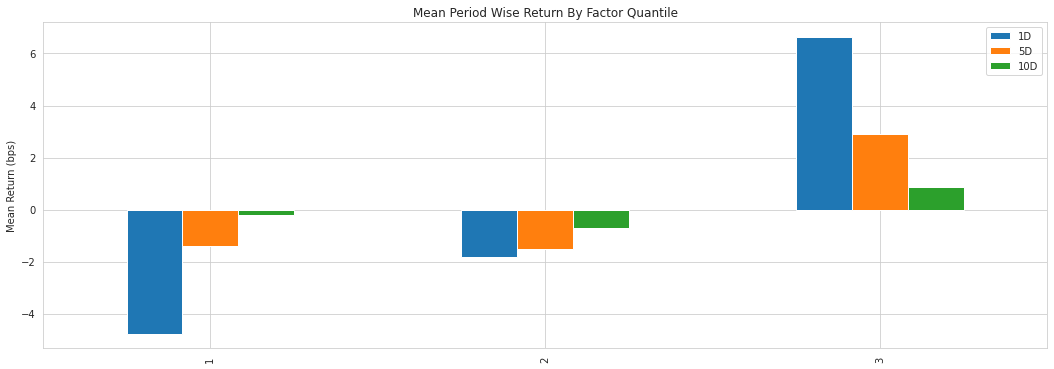

In [353]:
plotFactorQuantileBars(filtered_factor_data)

In [366]:
def plotCumulativeReturns(factor_data, p = '1D', demeaned = True, group_adjust = False):
    factor_returns = perf.factor_returns(
        factor_data, 
        demeaned = demeaned, 
        group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    p = '1D'
    title = \
        'Factor weighted LONG/SHORT portfolio cumulative returns'
    plotting.plot_cumulative_returns(
        factor_returns[p],
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

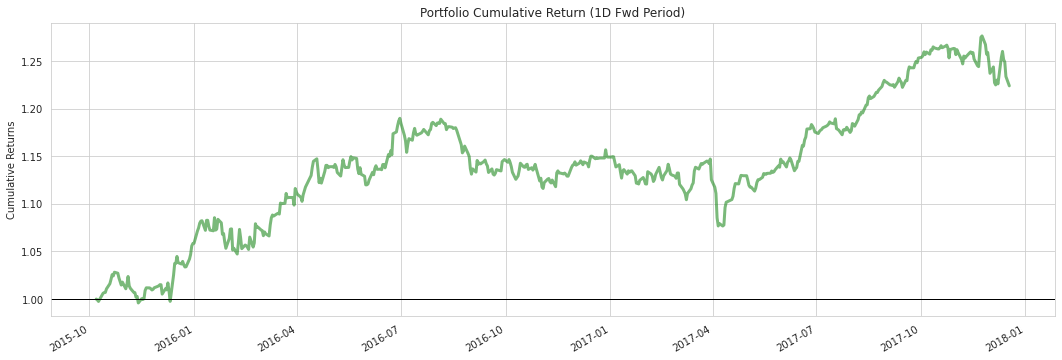

In [367]:
plotCumulativeReturns(filtered_factor_data)

In [205]:
def plotQuantileCumelativeReturns(factor_data, 
                                  p = '1D',
                                  demeaned = True,
                                  by_date = True,
                                  by_group = False,
                                  group_adjust = False):
    
    mean_quant_ret_bydate, std_quant_daily = \
            perf.mean_return_by_quantile(
                             factor_data,
                             demeaned = demeaned,
                             by_date = by_date,
                             by_group = by_group,
                             group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    cumulative_quantile_returns = \
        mean_quant_ret_bydate\
        .groupby(level = ['factor_quantile', 'date'])\
        .sum()[p]
    
    plotting.plot_cumulative_returns_by_quantile(
        cumulative_quantile_returns,
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

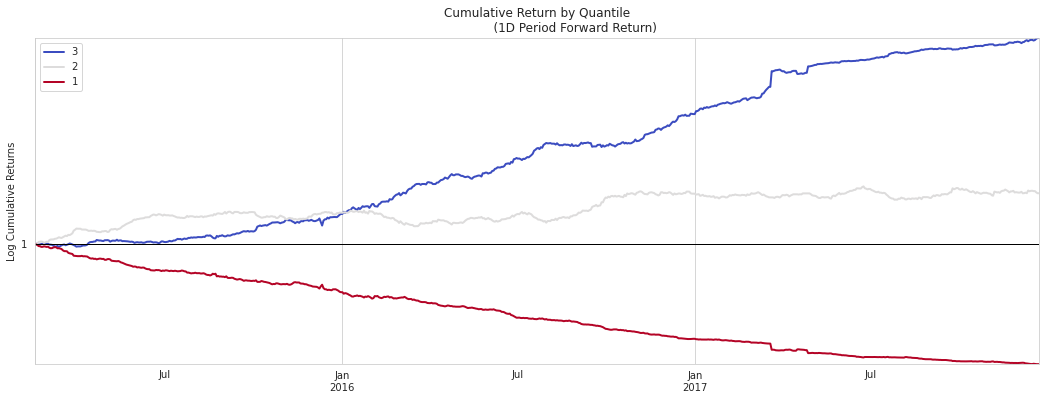

In [206]:
plotQuantileCumelativeReturns(factor_data)

In [129]:
pyfolio_input = alphalens.performance.create_pyfolio_input(filtered_factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [130]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

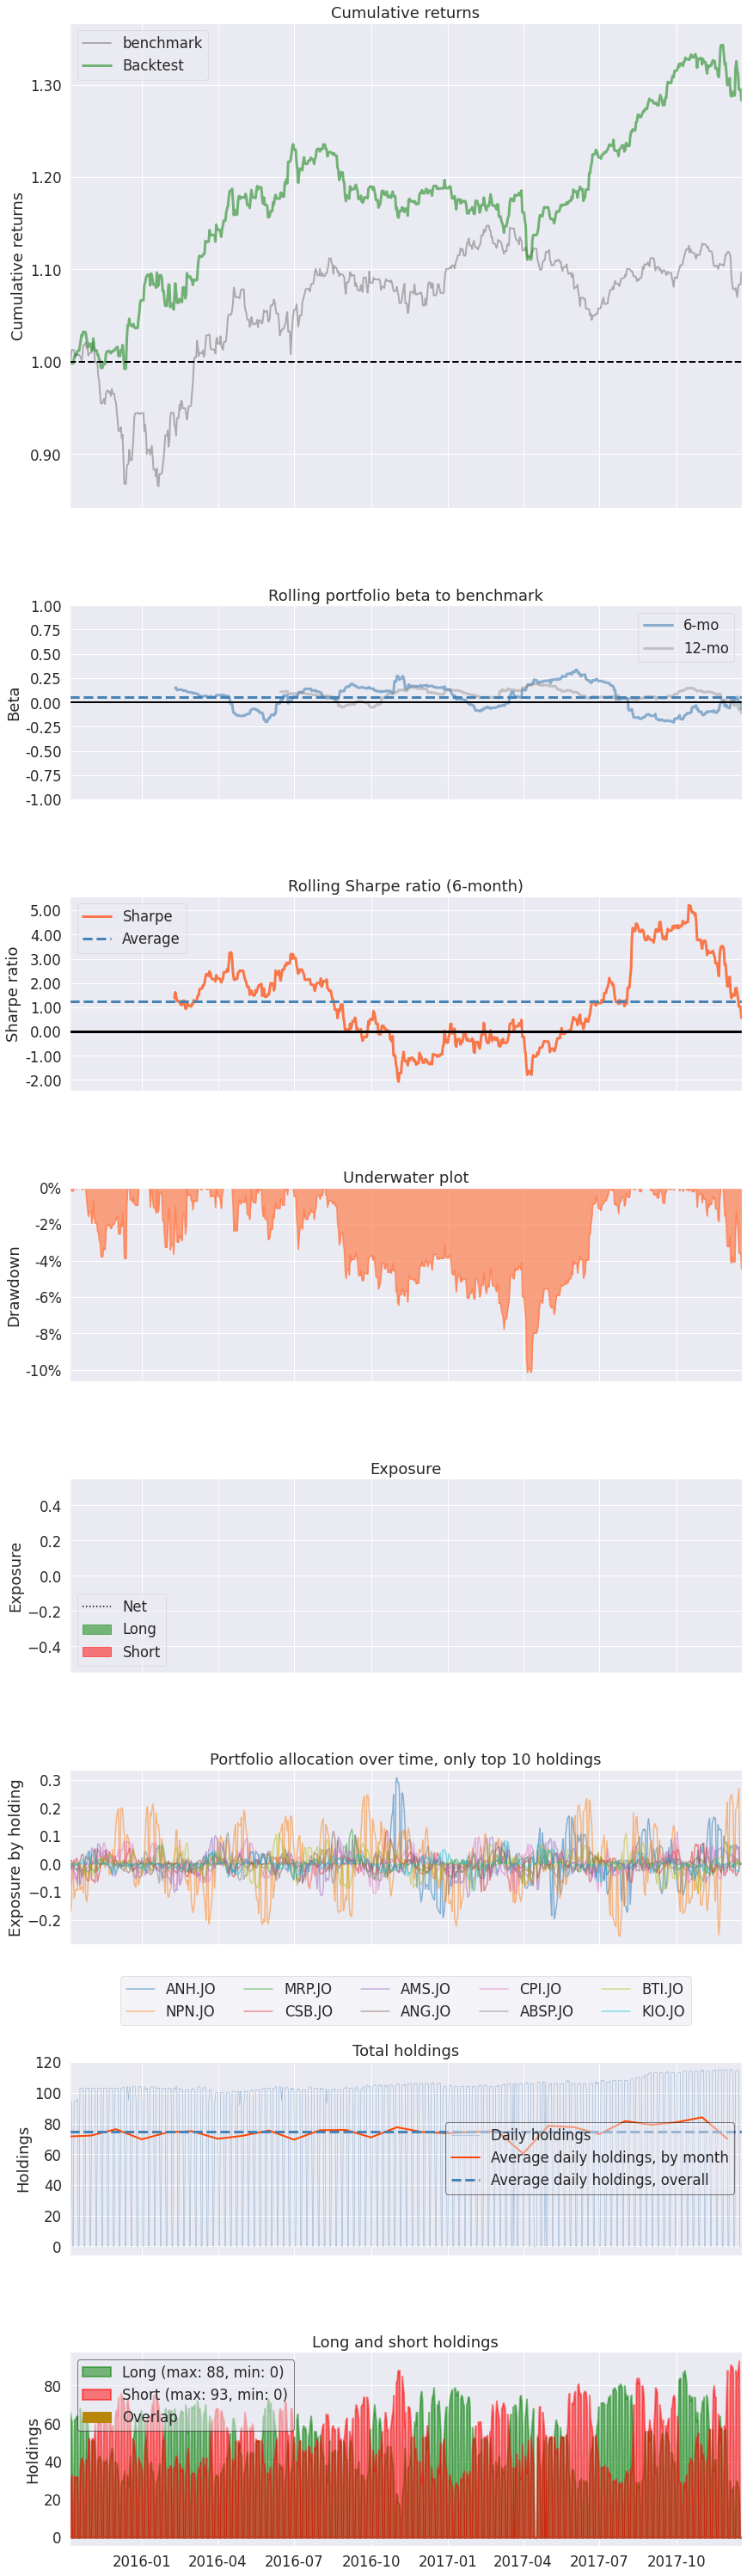

In [131]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, )

## Feature Engineering

### Labeling

In [216]:
def getCusumPrices(trainPrices, lookback = 5):
    cusumTrainPrices = {}
    for symbol, data in trainPrices.items():
        lookback = lookback
        if len(data) > lookback:

            ### EVENT BASED FILTERING
            data = data.copy()
            close = data['close']

            daily_vol = ml.util.get_daily_vol(
                close, 
                lookback = lookback)

            if daily_vol.nunique() != 1:

                # Apply Symmetric CUSUM Filter and get timestamps for events
                # Note: Only the CUSUM filter needs a point estimate for volatility
                cusum_events = ml.filters.cusum_filter(
                    close,
                    threshold = daily_vol)
                data_filt = data.loc[cusum_events]
                cusumTrainPrices[symbol] = data_filt
    return cusumTrainPrices

In [229]:
cusumTrainPrices = getCusumPrices(trainPrices, lookback = 5)

In [230]:
cusumTrainPrices['MTN.JO']

high      low     open    close      volume     adj_close
2015-01-06  21577.0  20850.0  20899.0  21245.0   5288437.0  14438.671875
2015-01-09  21039.0  20351.0  20949.0  20417.0   8011320.0  13875.942383
2015-01-12  20599.0  19891.0  20350.0  19988.0   7430078.0  13584.381836
2015-01-13  20475.0  19800.0  20195.0  20345.0  11467160.0  13827.007812
2015-01-14  20177.0  19809.0  19950.0  19812.0   9354214.0  13464.768555
...             ...      ...      ...      ...         ...           ...
2017-12-11  12846.0  12499.0  12833.0  12586.0   3121684.0  10442.835938
2017-12-14  13179.0  12570.0  12570.0  13173.0   6229685.0  10929.879883
2017-12-20  13261.0  12901.0  13221.0  13046.0   4835771.0  10824.506836
2017-12-26  13065.0  13065.0  13065.0  13065.0         0.0  10840.269531
2017-12-27  13570.0  13066.0  13249.0  13570.0   4275780.0  11259.278320

[293 rows x 6 columns]

In [231]:
def getTarget(cusumTrainPrices,
              lookback = 5,
              num_days_ahead = 1,
              pt_sl = [1, 1],
              min_ret = 0.005,
              inplace = True):

    for symbol, data in cusumTrainPrices.items():

        ### LABELING
        # Compute vertical barrier
        close = data['close']

        if len(close) > lookback:

            cusum_events = data.index

            daily_vol = ml.util.get_daily_vol(
                close, 
                lookback = lookback)

            vertical_barriers = ml.labeling.add_vertical_barrier(
                t_events = cusum_events,
                close = close,
                num_days = num_days_ahead)

            triple_barrier_events = ml.labeling.get_events(
                close = close,
                t_events = cusum_events,
                pt_sl = pt_sl,
                target = daily_vol,
                min_ret = min_ret,
                num_threads = 1,
                vertical_barrier_times = vertical_barriers,
                verbose = False)

            labels = ml.labeling.get_bins(
                triple_barrier_events, close)
            target = labels['bin']
            target.name = 'label'
            if inplace:
                cusumTrainPrices[symbol]['label'] = target

In [232]:
getTarget(cusumTrainPrices)

In [233]:
whl_data = cusumTrainPrices['WHL.JO'].copy()
whl_data

high     low    open   close     volume    adj_close  label
2015-01-06  7641.0  7354.0  7354.0  7621.0  1173591.0  6131.731934    NaN
2015-01-12  7850.0  7573.0  7752.0  7600.0  1381916.0  6114.835938    NaN
2015-01-15  7895.0  7670.0  7789.0  7825.0  3981562.0  6295.867188    1.0
2015-01-20  8144.0  7933.0  8000.0  8101.0  2057330.0  6517.932129    1.0
2015-01-21  8494.0  8110.0  8115.0  8494.0  6485544.0  6834.132812    0.0
...            ...     ...     ...     ...        ...          ...    ...
2017-12-12  5849.0  5628.0  5750.0  5692.0  3761626.0  5124.838379    0.0
2017-12-14  5894.0  5705.0  5705.0  5835.0  8117385.0  5253.589844    1.0
2017-12-18  6157.0  5787.0  5850.0  6096.0  6744774.0  5488.583008    0.0
2017-12-22  6326.0  6222.0  6283.0  6293.0  1920416.0  5665.954102    0.0
2017-12-28  6447.0  6300.0  6320.0  6447.0  2857012.0  5804.608887    NaN

[286 rows x 7 columns]

In [234]:
whl_data['emalong'] = ta.trend.ema(whl_data['close'], periods = 6)
whl_data['emashort'] =ta.trend.ema(whl_data['close'], periods = 4)

whl_data['macd'] = whl_data['emashort'] - whl_data['emalong']
whl_data['macd_ema'] = ta.trend.ema(whl_data['macd'], periods = 2)
whl_data['signal'] = whl_data['macd_ema'].sub(whl_data['macd'])
whl_data.dropna()

high     low    open   close     volume    adj_close  label  \
2015-02-04  8623.0  8175.0  8559.0  8250.0  4828152.0  6637.815430    0.0   
2015-02-12  8751.0  8450.0  8499.0  8669.0  8029100.0  6974.936035    1.0   
2015-02-16  9300.0  9088.0  9100.0  9225.0  5310836.0  7422.283203    0.0   
2015-02-19  9278.0  8907.0  8974.0  9200.0  4589815.0  7402.168945    0.0   
2015-02-26  9264.0  8994.0  9245.0  9070.0  3412309.0  7297.573730    0.0   
...            ...     ...     ...     ...        ...          ...    ...   
2017-12-07  6084.0  5808.0  6029.0  5827.0  3878443.0  5246.386719    0.0   
2017-12-12  5849.0  5628.0  5750.0  5692.0  3761626.0  5124.838379    0.0   
2017-12-14  5894.0  5705.0  5705.0  5835.0  8117385.0  5253.589844    1.0   
2017-12-18  6157.0  5787.0  5850.0  6096.0  6744774.0  5488.583008    0.0   
2017-12-22  6326.0  6222.0  6283.0  6293.0  1920416.0  5665.954102    0.0   

                emalong     emashort        macd    macd_ema     signal  
2015-02-04  8217.519783  8314.906176   97.386393  116.140683  18.754290  
2015-02-12  8346.514131  8456.543706  110.029575  112.066611   2.037036  
2015-02-16  8597.510094  8763.926223  166.416130  148.299623 -18.116506  
2015-02-19  8769.650067  8938.355734  168.705667  161.903653  -6.802015  
2015-02-26  8855.464333  8991.013440  135.549107  144.333955   8.784849  
...                 ...          ...         ...         ...        ...  
2017-12-07  5838.471994  5879.111192   40.639198   47.987525   7.348326  
2017-12-12  5796.622853  5804.266715    7.643863   21.091750  13.447887  
2017-12-14  5807.587752  5816.560029    8.972277   13.012101   4.039824  
2017-12-18  5889.991251  5928.336018   38.344766   29.900545  -8.444222  
2017-12-22  6005.136608  6074.201611   69.065002   56.010183 -13.054819  

[279 rows x 12 columns]

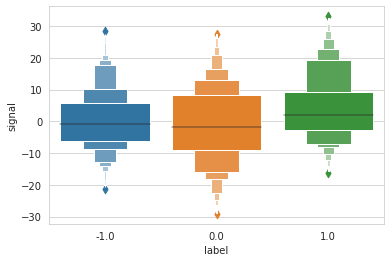

In [235]:
sns.boxenplot(data = whl_data, x = 'label', y = 'signal')

In [236]:
lookback = 5
target = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    if len(data) > lookback:
        labels = data[['label']]
        labels['asset'] = symbol
        labels.index.name = 'date'
        labels = labels.reset_index().set_index(['date', 'asset'])
        target = pd.concat([target, labels])

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
target

label
date       asset         
2017-10-24 4SI.JO     NaN
2017-10-27 4SI.JO     NaN
2017-11-03 4SI.JO    -1.0
2017-11-07 4SI.JO    -1.0
2017-11-08 4SI.JO     1.0
...                   ...
2017-12-07 ZPLP.JO    0.0
2017-12-14 ZPLP.JO    0.0
2017-12-15 ZPLP.JO    1.0
2017-12-18 ZPLP.JO    0.0
2017-12-20 ZPLP.JO    NaN

[78060 rows x 1 columns]

In [238]:
target.dropna(inplace = True)
target

label
date       asset         
2017-11-03 4SI.JO    -1.0
2017-11-07 4SI.JO    -1.0
2017-11-08 4SI.JO     1.0
2017-11-13 4SI.JO     0.0
2017-11-20 4SI.JO     0.0
...                   ...
2017-12-04 ZPLP.JO    0.0
2017-12-07 ZPLP.JO    0.0
2017-12-14 ZPLP.JO    0.0
2017-12-15 ZPLP.JO    1.0
2017-12-18 ZPLP.JO    0.0

[75920 rows x 1 columns]

In [239]:
(target['label'].value_counts() / len(target)).mul(100).round(2)

 0.0    58.01
 1.0    21.10
-1.0    20.89
Name: label, dtype: float64

### Moving Average Convergence Divergence and the impact of traded volume

In [310]:
macd_data = getIndicator(
    cusumTrainPrices, 
    macdDiff, 
    trailing_volume_n = 20, 
    n_slow = 6, n_fast = 4, n_sign = 2)

In [311]:
macd_data

MACD_diff_4_6
date       symbol                
2015-03-11 ABG.JO       28.950698
2015-03-16 ABG.JO      -10.024214
2015-03-19 ABG.JO      -37.730140
2015-03-20 ABG.JO      -13.112860
2015-03-24 ABG.JO      -31.404240
...                           ...
2017-12-07 ZPLP.JO      -3.114320
2017-12-14 ZPLP.JO       4.731060
2017-12-15 ZPLP.JO      -3.448026
2017-12-18 ZPLP.JO     -14.378569
2017-12-20 ZPLP.JO     -15.264344

[45055 rows x 1 columns]

In [322]:
macd_data = macd_data.unstack().asfreq('C').stack()

In [313]:
prices_data = getPrices(trainPrices, macd_data.index.levels[1])

In [320]:
prices_data = prices_data.asfreq('C')

In [323]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248  -8.601468              1.0
           CML.JO -0.013383  0.001368 -0.027547  12.816580              3.0
           FFB.JO  0.024096  0.077108  0.101549   9.717235              2.0
           TCP.JO  0.009783 -0.010870 -0.021739  -1.997219              1.0
           TON.JO -0.011037 -0.006689 -0.036856  38.190104              3.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -19.251014              1.0
           SOL.JO  0.000000  0.000000  0.018144  -5.487172              2.0
           TWR.JO  0.000000  0.000000  0.037037  -0.009033              3.0
           VOD.JO  0.000000  0.000000  0.034020   5.048420              3.0
           WHL.JO  0.000000  0.000000  0.035277 -13.054819              1.0

[44804 rows x 5 columns]

In [335]:
def getVolumeOsc(open = None, high = None, low = None, close = None, volume = None,
                periods = 4):
    vol_sma = ta.trend.ema(volume, periods = periods)
    vol_sma.name = 'volume_oscillator20'
    return vol_sma

In [336]:
volume_osc_data = getIndicator(cusumTrainPrices, getVolumeOsc, trailing_volume_n = 20)
volume_osc_data

volume_oscillator20
date       symbol                      
2015-03-11 ABG.JO          1.603627e+06
2015-03-16 ABG.JO          1.358964e+06
2015-03-19 ABG.JO          2.126315e+06
2015-03-20 ABG.JO          1.801746e+06
2015-03-24 ABG.JO          1.491816e+06
...                                 ...
2017-12-07 ZPLP.JO         1.932179e+05
2017-12-14 ZPLP.JO         1.514603e+05
2017-12-15 ZPLP.JO         1.051630e+05
2017-12-18 ZPLP.JO         8.056900e+04
2017-12-20 ZPLP.JO         4.834620e+04

[45055 rows x 1 columns]

In [340]:
volume_osc_data = volume_osc_data.unstack().asfreq('C').stack()

In [338]:
def createGroupingFactor(factor_data, 
                         group_data, 
                         prices_data, 
                         num_groupes = 3):
    
    group_factor_data = alphalens\
    .utils.get_clean_factor_and_forward_returns(
        factor = group_data,
        prices = prices_data,
        quantiles = num_groupes,
        periods = [1]
    )
#     volume_factor_data

    qroup_quantiles = group_factor_data['factor_quantile']
    qroup_quantiles.name = 'group'
    factor_data_w_group = pd.concat(
        [factor_data, qroup_quantiles], 
        axis = 1).dropna()
    return factor_data_w_group

In [341]:
factor_data = createGroupingFactor(
    factor_data, 
    group_data = volume_osc_data, 
    prices_data = prices_data, 
    num_groupes = 3)
factor_data

Dropped 0.2% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile  \
date       asset                                                              
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248  -8.601468              1.0   
           CML.JO -0.013383  0.001368 -0.027547  12.816580              3.0   
           FFB.JO  0.024096  0.077108  0.101549   9.717235              2.0   
           TCP.JO  0.009783 -0.010870 -0.021739  -1.997219              1.0   
           TON.JO -0.011037 -0.006689 -0.036856  38.190104              3.0   
...                     ...       ...       ...        ...              ...   
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -19.251014              1.0   
           SOL.JO  0.000000  0.000000  0.018144  -5.487172              2.0   
           TWR.JO  0.000000  0.000000  0.037037  -0.009033              3.0   
           VOD.JO  0.000000  0.000000  0.034020   5.048420              3.0   
           WHL.JO  0.000000  0.000000  0.035277 -13.054819              1.0   

                   group  
date       asset          
2015-03-02 CCO.JO    3.0  
           CML.JO    3.0  
           FFB.JO    2.0  
           TCP.JO    1.0  
           TON.JO    1.0  
...                  ...  
2017-12-22 SNT.JO    1.0  
           SOL.JO    3.0  
           TWR.JO    1.0  
           VOD.JO    3.0  
           WHL.JO    3.0  

[44804 rows x 6 columns]

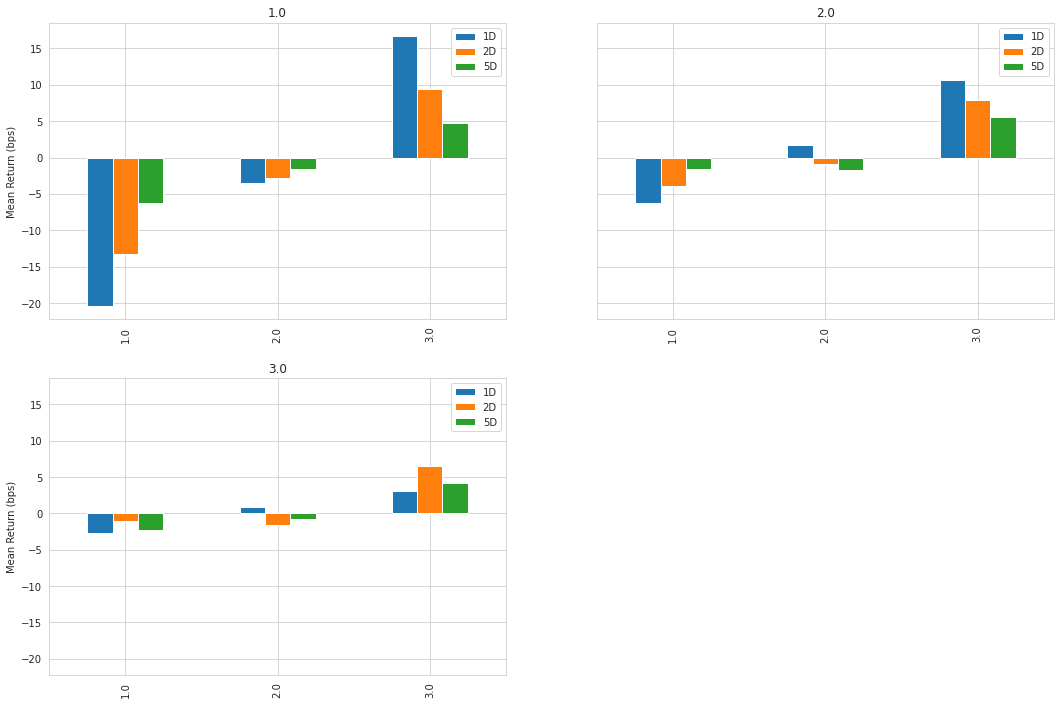

In [357]:
plotFactorQuantileBars(factor_data, by_group = True, group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

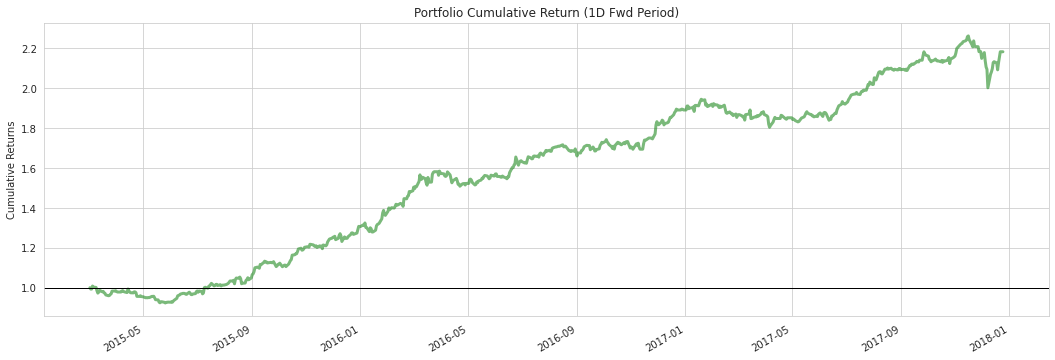

In [368]:
plotCumulativeReturns(factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

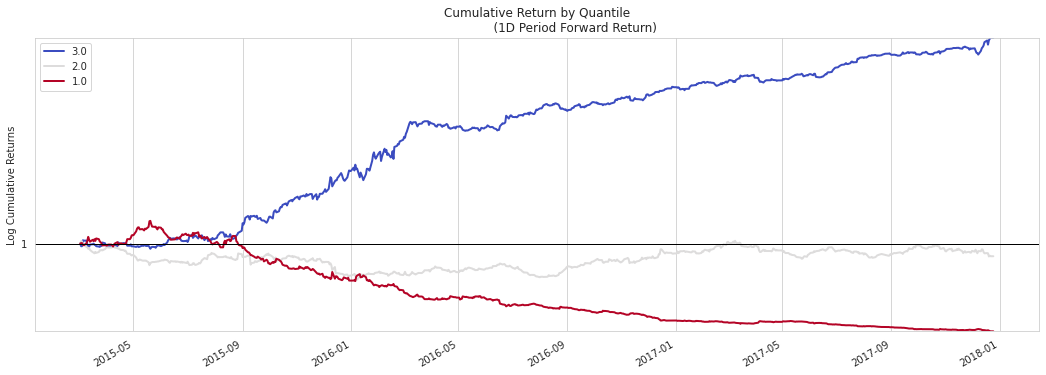

In [369]:
plotQuantileCumelativeReturns(factor_data, by_group = True)

In [373]:
target

label
date       asset         
2017-11-03 4SI.JO    -1.0
2017-11-07 4SI.JO    -1.0
2017-11-08 4SI.JO     1.0
2017-11-13 4SI.JO     0.0
2017-11-20 4SI.JO     0.0
...                   ...
2017-12-04 ZPLP.JO    0.0
2017-12-07 ZPLP.JO    0.0
2017-12-14 ZPLP.JO    0.0
2017-12-15 ZPLP.JO    1.0
2017-12-18 ZPLP.JO    0.0

[75920 rows x 1 columns]

In [374]:
y = factor_data['factor_quantile'].map({1:-1, 2:0, 3:1})
y.name = 'quantile_prediction'
tradeable = factor_data['group']
tradeable.name = 'tradeable'
results = pd.concat([target, y, tradeable], axis = 1).dropna()
results

label  quantile_prediction  tradeable
date       asset                                        
2015-03-02 CCO.JO   -1.0                 -1.0        3.0
           CML.JO    0.0                  1.0        3.0
           FFB.JO    1.0                  0.0        2.0
           TCP.JO    0.0                 -1.0        1.0
           TON.JO    1.0                  1.0        1.0
...                  ...                  ...        ...
2017-12-22 SBK.JO    0.0                  1.0        3.0
           SOL.JO    0.0                  0.0        3.0
           TWR.JO    1.0                  1.0        1.0
           VOD.JO    0.0                  1.0        3.0
           WHL.JO    0.0                 -1.0        3.0

[44606 rows x 3 columns]

In [375]:
print(classification_report(results['label'], results['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.23      0.37      0.28      9299
         0.0       0.57      0.32      0.41     26108
         1.0       0.22      0.36      0.27      9199

    accuracy                           0.34     44606
   macro avg       0.34      0.35      0.32     44606
weighted avg       0.43      0.34      0.36     44606



In [376]:
data = results[results['tradeable'] == 1]
print(classification_report(data['label'], data['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.24      0.38      0.30      3101
         0.0       0.59      0.35      0.44      8888
         1.0       0.23      0.37      0.28      3034

    accuracy                           0.36     15023
   macro avg       0.35      0.36      0.34     15023
weighted avg       0.44      0.36      0.38     15023



In [377]:
data = results[results['tradeable'] == 2]
print(classification_report(data['label'], data['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.23      0.36      0.28      3088
         0.0       0.57      0.33      0.42      8491
         1.0       0.22      0.35      0.27      3089

    accuracy                           0.34     14668
   macro avg       0.34      0.35      0.32     14668
weighted avg       0.42      0.34      0.36     14668



In [378]:
data = results[results['tradeable'] == 3]
print(classification_report(data['label'], data['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.22      0.38      0.28      3110
         0.0       0.56      0.28      0.38      8729
         1.0       0.22      0.36      0.27      3076

    accuracy                           0.32     14915
   macro avg       0.33      0.34      0.31     14915
weighted avg       0.42      0.32      0.33     14915



In [379]:
X = pd.concat([results['quantile_prediction'], factor_data['factor']], axis = 1).dropna()[['factor']]
y = results['quantile_prediction']
y

date        asset 
2015-03-02  CCO.JO   -1.0
            CML.JO    1.0
            FFB.JO    0.0
            TCP.JO   -1.0
            TON.JO    1.0
                     ... 
2017-12-22  SBK.JO    1.0
            SOL.JO    0.0
            TWR.JO    1.0
            VOD.JO    1.0
            WHL.JO   -1.0
Name: quantile_prediction, Length: 44606, dtype: float64

In [380]:
n_classes = 3
multi_y = pd.DataFrame(
    label_binarize(
        y, 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = y.index)
multi_y

-1   0   1
date       asset             
2015-03-02 CCO.JO   1   0   0
           CML.JO   0   0   1
           FFB.JO   0   1   0
           TCP.JO   1   0   0
           TON.JO   0   0   1
...                ..  ..  ..
2017-12-22 SBK.JO   0   0   1
           SOL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   0   1
           WHL.JO   1   0   0

[44606 rows x 3 columns]

In [381]:
clf = LogisticRegression()
model = OneVsRestClassifier(clf)
model.fit(X, multi_y)

OneVsRestClassifier(estimator=LogisticRegression())

In [382]:
probs = model.predict_proba(X)
probs = pd.DataFrame(
    probs, 
    index = multi_y.index, 
    columns = multi_y.columns)
probs

-1         0         1
date       asset                                   
2015-03-02 CCO.JO  9.753856e-01  0.326820  0.001184
           CML.JO  9.589463e-05  0.326925  0.997858
           FFB.JO  6.226769e-04  0.326909  0.986342
           TCP.JO  4.236093e-01  0.326852  0.059202
           TON.JO  2.130572e-11  0.327049  1.000000
...                         ...       ...       ...
2017-12-22 SBK.JO  7.288333e-04  0.326908  0.984058
           SOL.JO  8.580479e-01  0.326835  0.007655
           TWR.JO  1.811776e-01  0.326862  0.172215
           VOD.JO  1.033378e-02  0.326886  0.813315
           WHL.JO  9.982879e-01  0.326798  0.000081

[44606 rows x 3 columns]

In [383]:
results['label']

date        asset 
2015-03-02  CCO.JO   -1.0
            CML.JO    0.0
            FFB.JO    1.0
            TCP.JO    0.0
            TON.JO    1.0
                     ... 
2017-12-22  SBK.JO    0.0
            SOL.JO    0.0
            TWR.JO    1.0
            VOD.JO    0.0
            WHL.JO    0.0
Name: label, Length: 44606, dtype: float64

In [384]:
true_y = pd.DataFrame(
    label_binarize(
        results['label'], 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = results['label'].index)
true_y

-1   0   1
date       asset             
2015-03-02 CCO.JO   1   0   0
           CML.JO   0   1   0
           FFB.JO   0   0   1
           TCP.JO   0   1   0
           TON.JO   0   0   1
...                ..  ..  ..
2017-12-22 SBK.JO   0   1   0
           SOL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   1   0
           WHL.JO   0   1   0

[44606 rows x 3 columns]

In [385]:
def plotROC(true_y, probabilities):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    classes = [-1, 0.0, 1]
    roc_auc = dict()
    for i, label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    for i, label in enumerate(classes):

    #     print(i)
        data = pd.DataFrame({'FPR':fpr[i], 'TPR':tpr[i], 'roc':roc_auc[i]})
        line_data = pd.DataFrame({'x':[0, 1], 'y':[0, 1]})

        g = sns.lineplot(data = line_data, x = 'x', y = 'y',ax = axes[i], legend = None, color = 'black')
        g = data.plot(x = 'FPR', y = 'TPR', ax = axes[i], kind = 'line', legend = None)

        g.lines[0].set_linestyle("--")
        g.set_ylabel('TPR')
        if label == 1:
            g.set_title(f"Long \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == -1:
            g.set_title(f"Short \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == 0:
            g.set_title(f"Neutral \n \n AUC = {round(roc_auc[i], 2)}")
    plt.show()

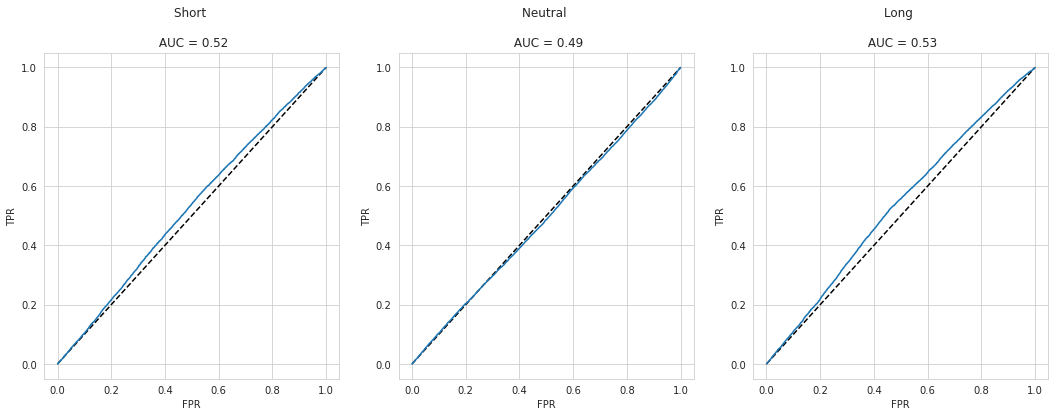

In [386]:
plotROC(true_y, probs)

In [387]:
train = pd.concat([factor_data[['factor', 'group']], target], axis = 1).dropna()
train['label'] = train['label'].astype('object')
train['group'] = train['group'].astype('object')
train

factor group label
date       asset                        
2015-03-02 CCO.JO  -8.601468     3    -1
           CML.JO  12.816580     3     0
           FFB.JO   9.717235     2     1
           TCP.JO  -1.997219     1     0
           TON.JO  38.190104     1     1
...                      ...   ...   ...
2017-12-22 SBK.JO   9.456337     3     0
           SOL.JO  -5.487172     3     0
           TWR.JO  -0.009033     1     1
           VOD.JO   5.048420     3     0
           WHL.JO -13.054819     3     0

[44606 rows x 3 columns]

In [388]:
train['label'].value_counts()

 0.0    26108
-1.0     9299
 1.0     9199
Name: label, dtype: int64

(-250.0, 250.0)

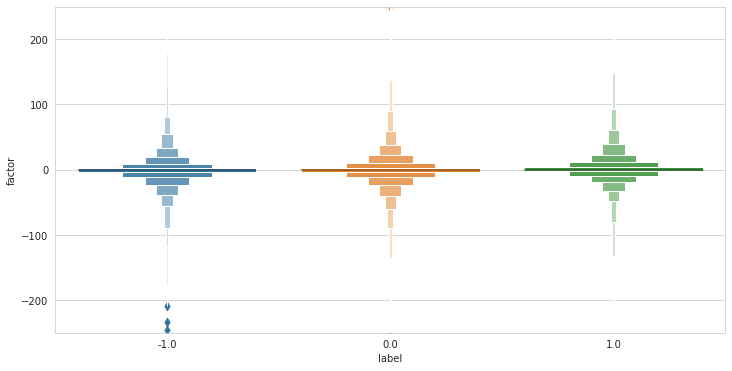

In [389]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor')
g.set_ylim(-250, 250)

(-250.0, 250.0)

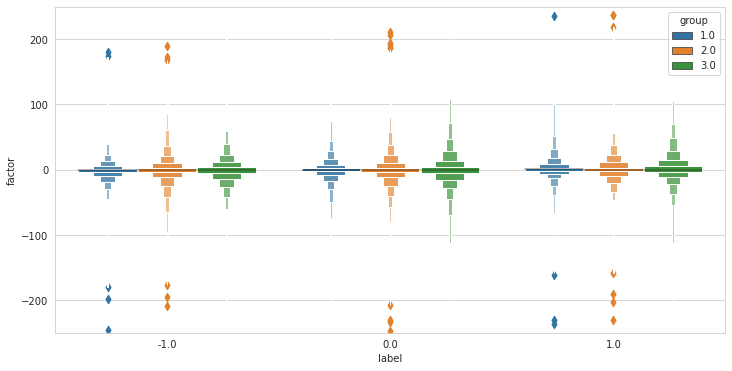

In [390]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor', hue = 'group')
g.set_ylim(-250, 250)

#### Perfomance evaluation

In [391]:
train['label'] = train['label'].astype('int')
train['group'] = train['group'].astype('int')
X = train[['factor', 'group']]
y = train['label'].astype('int')

In [392]:
def upsamplingCV(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    kf = KFold(n_splits = cv)
    for train_index, test_index in kf.split(X, y):

        train_X = X.iloc[train_index, ]
        train_y = y.iloc[train_index]

        test_X = X.iloc[test_index, ]
        test_y = y.iloc[test_index]

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']


        n_classes = 3
        upsampled_y = pd.DataFrame(label_binarize(
            upsampled_y, 
            classes = [-1, 0, 1]),
            index = upsampled_y.index,
            columns = [-1, 0, 1])

        model = OneVsRestClassifier(clf)
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = model.predict_proba(test_X)
        probs = pd.DataFrame(
            probs, 
            index = test_y.index, 
            columns = upsampled_y.columns)


        probabilities = pd.concat(
            [probabilities, probs])

    return probabilities

In [393]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [394]:
def convertToMultiClass(y):
    classes = [-1, 0, 1]
    transformed_y = pd.DataFrame(label_binarize(
        y, 
        classes = classes),
        index = y.index,
        columns = [-1, 0, 1])
    return transformed_y

In [395]:
true_y = convertToMultiClass(y)

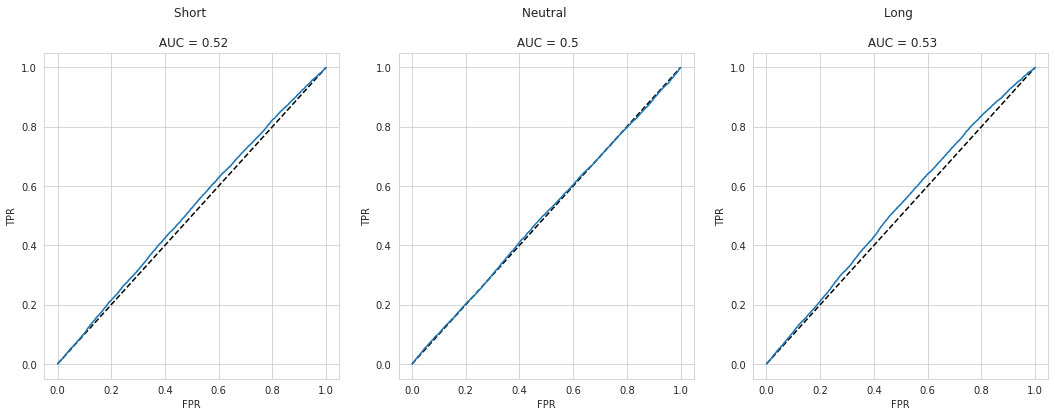

In [396]:
plotROC(true_y, probabilities)

### Bollinger Bands

In [400]:
data = cusumTrainPrices['WHL.JO'].copy()
close = data['close']
n = 12
data['movav'] = ta.trend.sma(close, periods = n)
data['upper'] = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
data['lower'] = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

data['perc_b'] = (close - data['lower'])/(data['upper'] - data['lower'])

data['mfi'] = ta.volume.MFIIndicator(
    data['high'], data['low'], close, data['volume'], n = n)\
    .money_flow_index()

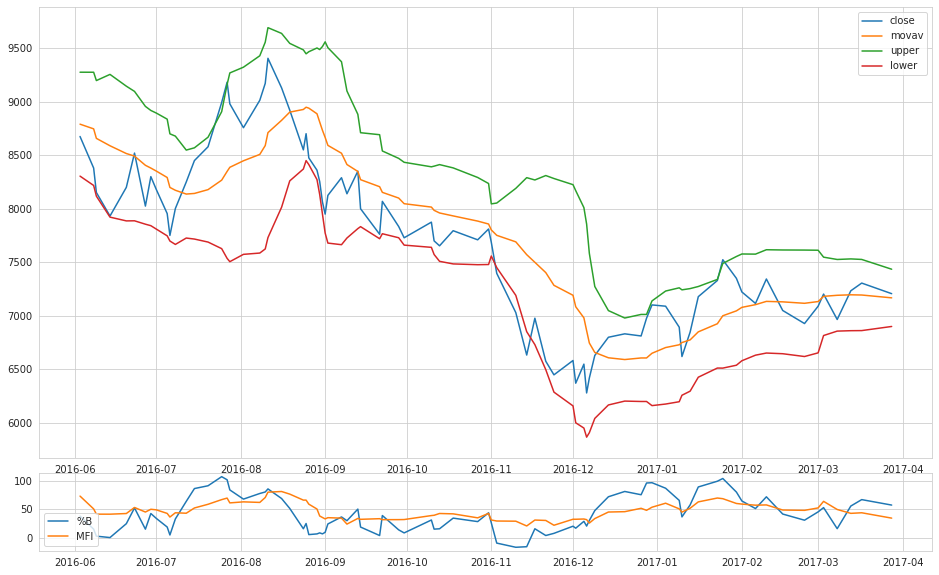

In [401]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = data.loc[datetime(2016, 6, 1):datetime(2017, 3, 28)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['movav'])
ax1.plot(data.index, data['upper'])
ax1.plot(data.index, data['lower'])
ax1.legend(('close', 'movav', 'upper', 'lower', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['perc_b'] * 100)
ax2.plot(data.index, data['mfi'])
# ax2.plot(data.index, data['signal'])
# ax2.plot(data.index, data['signal'].diff())
# ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('%B', 'MFI', ), loc = 'lower left')

In [404]:
%time
bbands_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
        upper = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
        lower = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

        perc_b = (close - lower)/(upper - lower) * -1
        perc_b.name = 'perc_b'

        out = pd.DataFrame(perc_b)
        out['symbol'] = symbol
        out.index.name = 'date'
        out = out.reset_index().set_index(['date', 'symbol'])

        volume = data['volume']
        
        # volume filter
        trailing_dollar_volume = getTrailingVolume(close, volume, symbol, n = 20)
        
        # price filter
        prices = getPricing(close, symbol)
        
        out = pd.concat([out, trailing_dollar_volume, prices], axis = 1)
        
        volume_mask = out['trailing_dollar_volume'] > minimum_dollar_volume
        price_mask = out['close'] > minimum_price
        out = out[volume_mask & price_mask][['perc_b']]
        
        
        bbands_data = pd.concat([bbands_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [405]:
# bbands_data = bbands_data[bbands_data['trailing_dollar_volume'] > minimum_dollar_volume][['perc_b']]
bbands_data

perc_b
date       symbol           
2015-03-11 ABG.JO   0.041220
2015-03-16 ABG.JO  -0.233252
2015-03-19 ABG.JO  -0.466883
2015-03-20 ABG.JO  -0.322093
2015-03-24 ABG.JO  -0.615574
...                      ...
2017-12-07 ZPLP.JO -0.641433
2017-12-14 ZPLP.JO -0.290697
2017-12-15 ZPLP.JO -0.798945
2017-12-18 ZPLP.JO -1.154887
2017-12-20 ZPLP.JO -1.105009

[45055 rows x 1 columns]

In [407]:
bbands_data = bbands_data.unstack().asfreq('C').stack()

In [408]:
bbands_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = bbands_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
bbands_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                          
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248 -1.058853              1.0
           CML.JO -0.013383  0.001368 -0.027547 -0.260016              3.0
           FFB.JO  0.024096  0.077108  0.101549 -0.773837              2.0
           TCP.JO  0.009783 -0.010870 -0.021739 -1.097198              1.0
           TON.JO -0.011037 -0.006689 -0.036856  0.106009              3.0
...                     ...       ...       ...       ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -0.879140              1.0
           SOL.JO  0.000000  0.000000  0.018144 -0.373643              3.0
           TWR.JO  0.000000  0.000000  0.037037 -0.185444              3.0
           VOD.JO  0.000000  0.000000  0.034020 -0.247161              3.0
           WHL.JO  0.000000  0.000000  0.035277 -0.982370              1.0

[44804 rows x 5 columns]

In [411]:
%time
mfi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
        
        mfi = ta.volume.MFIIndicator(
            data['high'], data['low'], close, data['volume'], n = n)\
            .money_flow_index()
        mfi.name = 'mfi'

        out = pd.DataFrame(mfi)
        out['symbol'] = symbol
        out.index.name = 'date'
        out = out.reset_index().set_index(['date', 'symbol'])
        
        volume = data['volume']
        
        # volume filter
        trailing_dollar_volume = getTrailingVolume(close, volume, symbol, n = 20)
        
        # price filter
        prices = getPricing(close, symbol)
        
        out = pd.concat([out, trailing_dollar_volume, prices], axis = 1)
        
        volume_mask = out['trailing_dollar_volume'] > minimum_dollar_volume
        price_mask = out['close'] > minimum_price
        out = out[volume_mask & price_mask][['mfi']]
        

        mfi_data = pd.concat([mfi_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


In [414]:
mfi_data = mfi_data.unstack().asfreq('C').stack()

In [415]:
bbands_factor_data = createGroupingFactor(
    bbands_factor_data, 
    group_data = mfi_data, 
    prices_data = prices_data, 
    num_groupes = 2)
bbands_factor_data

Dropped 0.2% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile  \
date       asset                                                             
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248 -1.058853              1.0   
           CML.JO -0.013383  0.001368 -0.027547 -0.260016              3.0   
           FFB.JO  0.024096  0.077108  0.101549 -0.773837              2.0   
           TCP.JO  0.009783 -0.010870 -0.021739 -1.097198              1.0   
           TON.JO -0.011037 -0.006689 -0.036856  0.106009              3.0   
...                     ...       ...       ...       ...              ...   
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -0.879140              1.0   
           SOL.JO  0.000000  0.000000  0.018144 -0.373643              3.0   
           TWR.JO  0.000000  0.000000  0.037037 -0.185444              3.0   
           VOD.JO  0.000000  0.000000  0.034020 -0.247161              3.0   
           WHL.JO  0.000000  0.000000  0.035277 -0.982370              1.0   

                   group  
date       asset          
2015-03-02 CCO.JO    2.0  
           CML.JO    1.0  
           FFB.JO    1.0  
           TCP.JO    2.0  
           TON.JO    1.0  
...                  ...  
2017-12-22 SNT.JO    1.0  
           SOL.JO    1.0  
           TWR.JO    1.0  
           VOD.JO    1.0  
           WHL.JO    2.0  

[44804 rows x 6 columns]

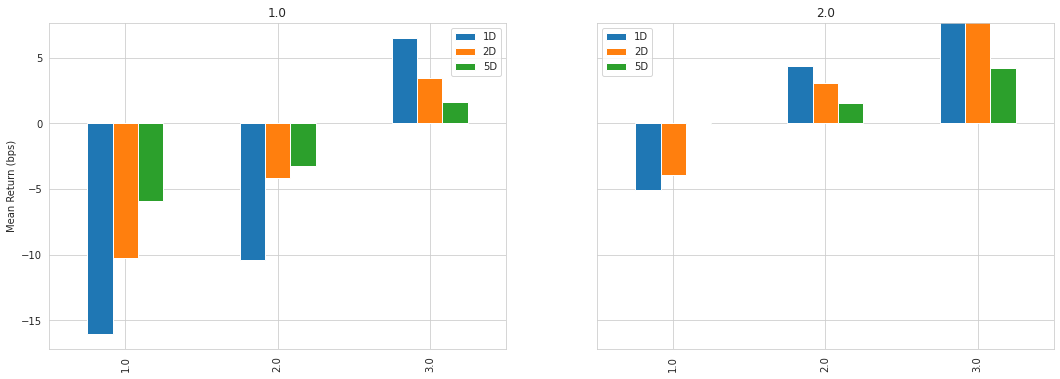

In [416]:
plotFactorQuantileBars(bbands_factor_data, by_group = True, group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

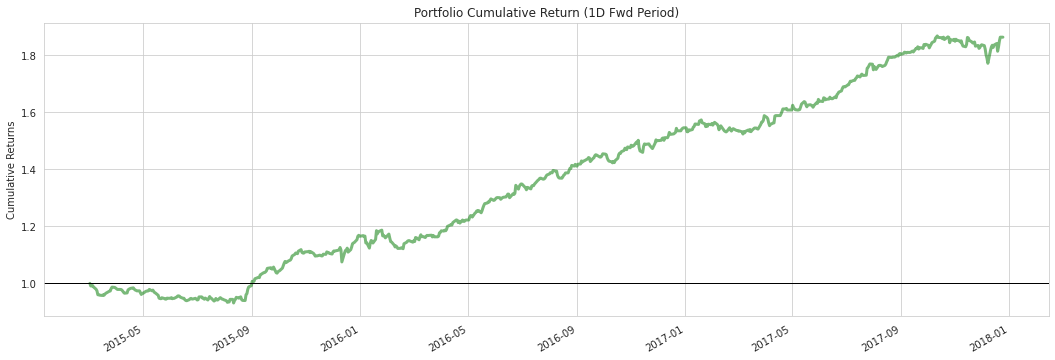

In [417]:
plotCumulativeReturns(bbands_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

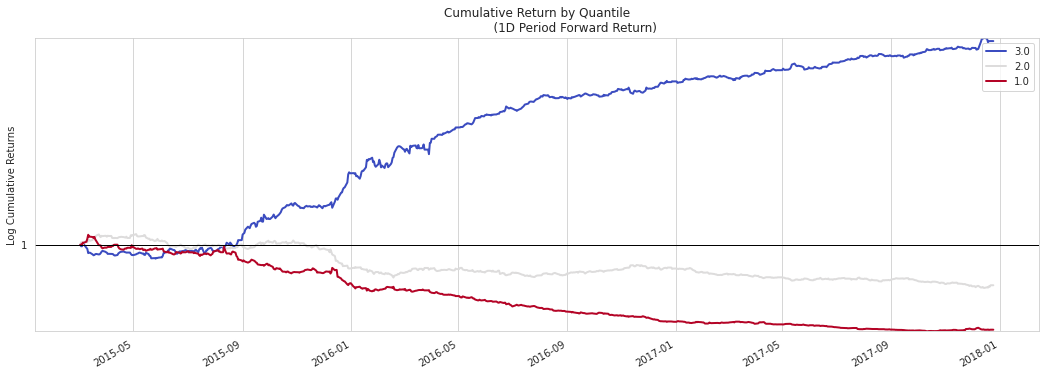

In [418]:
plotQuantileCumelativeReturns(bbands_factor_data, by_group = True)

In [419]:
mfi = pd.concat([bbands_factor_data['group'], mfi_data], axis = 1).dropna()
mfi.groupby('group').mean()

mfi
group           
1.0    34.434466
2.0    67.552194

In [420]:
y = bbands_factor_data['factor_quantile'].map({1:-1, 2:0, 3:1})
y.name = 'quantile_prediction'
results = pd.concat([target, y], axis = 1).dropna()
results

label  quantile_prediction
date       asset                             
2015-03-02 CCO.JO   -1.0                 -1.0
           CML.JO    0.0                  1.0
           FFB.JO    1.0                  0.0
           TCP.JO    0.0                 -1.0
           TON.JO    1.0                  1.0
...                  ...                  ...
2017-12-22 SBK.JO    0.0                  0.0
           SOL.JO    0.0                  1.0
           TWR.JO    1.0                  1.0
           VOD.JO    0.0                  1.0
           WHL.JO    0.0                 -1.0

[44606 rows x 2 columns]

In [421]:
print(classification_report(results['label'], results['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.23      0.38      0.29      9299
         0.0       0.63      0.35      0.45     26108
         1.0       0.25      0.40      0.30      9199

    accuracy                           0.37     44606
   macro avg       0.37      0.38      0.35     44606
weighted avg       0.47      0.37      0.39     44606



In [422]:
bbands = bbands_factor_data['factor']
bbands.name = 'bbands'

In [423]:
X = pd.concat([results['quantile_prediction'], bbands], axis = 1).dropna()[['bbands']]
y = results['quantile_prediction']
y

date        asset 
2015-03-02  CCO.JO   -1.0
            CML.JO    1.0
            FFB.JO    0.0
            TCP.JO   -1.0
            TON.JO    1.0
                     ... 
2017-12-22  SBK.JO    0.0
            SOL.JO    1.0
            TWR.JO    1.0
            VOD.JO    1.0
            WHL.JO   -1.0
Name: quantile_prediction, Length: 44606, dtype: float64

In [424]:
n_classes = 3
multi_y = pd.DataFrame(
    label_binarize(
        y, 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = y.index)
multi_y

-1   0   1
date       asset             
2015-03-02 CCO.JO   1   0   0
           CML.JO   0   0   1
           FFB.JO   0   1   0
           TCP.JO   1   0   0
           TON.JO   0   0   1
...                ..  ..  ..
2017-12-22 SBK.JO   0   1   0
           SOL.JO   0   0   1
           TWR.JO   0   0   1
           VOD.JO   0   0   1
           WHL.JO   1   0   0

[44606 rows x 3 columns]

In [425]:
clf = LogisticRegression()
model = OneVsRestClassifier(clf)
model.fit(X, multi_y)

OneVsRestClassifier(estimator=LogisticRegression())

In [426]:
probs = model.predict_proba(X)
probs = pd.DataFrame(
    probs, 
    index = multi_y.index, 
    columns = multi_y.columns)
probs

-1         0         1
date       asset                               
2015-03-02 CCO.JO  0.983398  0.309555  0.000453
           CML.JO  0.014659  0.335943  0.637709
           FFB.JO  0.754713  0.318840  0.008579
           TCP.JO  0.988787  0.308318  0.000305
           TON.JO  0.000333  0.348397  0.987281
...                     ...       ...       ...
2017-12-22 SBK.JO  0.768788  0.318594  0.007945
           SOL.JO  0.046139  0.332121  0.352061
           TWR.JO  0.006815  0.338462  0.791971
           VOD.JO  0.012852  0.336376  0.667835
           WHL.JO  0.964009  0.312032  0.001000

[44606 rows x 3 columns]

In [427]:
true_y = pd.DataFrame(
    label_binarize(
        results['label'], 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = results['label'].index)
true_y

-1   0   1
date       asset             
2015-03-02 CCO.JO   1   0   0
           CML.JO   0   1   0
           FFB.JO   0   0   1
           TCP.JO   0   1   0
           TON.JO   0   0   1
...                ..  ..  ..
2017-12-22 SBK.JO   0   1   0
           SOL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   1   0
           WHL.JO   0   1   0

[44606 rows x 3 columns]

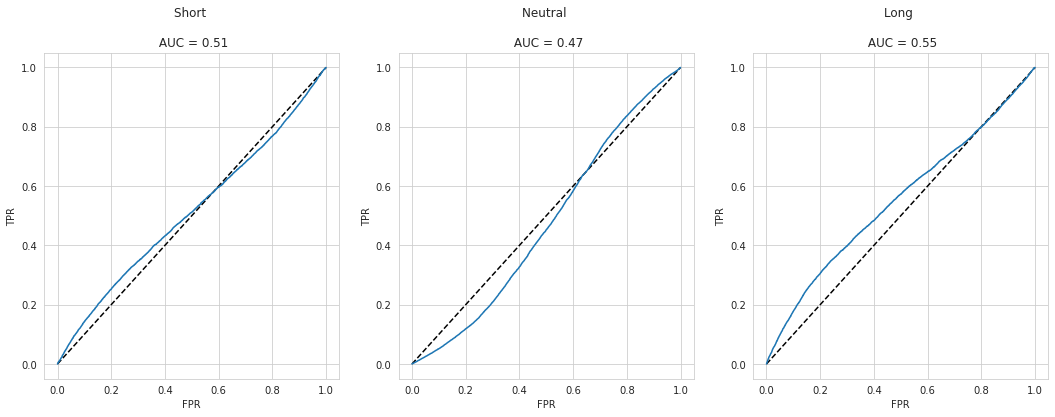

In [428]:
plotROC(true_y, probs)

In [429]:
train.rename(columns = {'group':'volume_group', 'factor':'macd'}, inplace = True)
train

macd  volume_group  label
date       asset                                 
2015-03-02 CCO.JO  -8.601468             3     -1
           CML.JO  12.816580             3      0
           FFB.JO   9.717235             2      1
           TCP.JO  -1.997219             1      0
           TON.JO  38.190104             1      1
...                      ...           ...    ...
2017-12-22 SBK.JO   9.456337             3      0
           SOL.JO  -5.487172             3      0
           TWR.JO  -0.009033             1      1
           VOD.JO   5.048420             3      0
           WHL.JO -13.054819             3      0

[44606 rows x 3 columns]

In [430]:
# train.drop(['bbands', 'mfi_group'], axis = 1, inplace = True)

In [431]:
bb_factor = bbands_factor_data['factor']
bb_factor.name = 'bbands'
bb_mfi_group = bbands_factor_data['group']
bb_mfi_group.name = 'mfi_group'
train = pd.concat([train, bb_factor, bb_mfi_group], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group
date       asset                                                      
2015-03-02 CCO.JO  -8.601468           3.0   -1.0 -1.058853        2.0
           CML.JO  12.816580           3.0    0.0 -0.260016        1.0
           FFB.JO   9.717235           2.0    1.0 -0.773837        1.0
           TCP.JO  -1.997219           1.0    0.0 -1.097198        2.0
           TON.JO  38.190104           1.0    1.0  0.106009        1.0
...                      ...           ...    ...       ...        ...
2017-12-22 SBK.JO   9.456337           3.0    0.0 -0.781312        2.0
           SOL.JO  -5.487172           3.0    0.0 -0.373643        1.0
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0

[44606 rows x 5 columns]

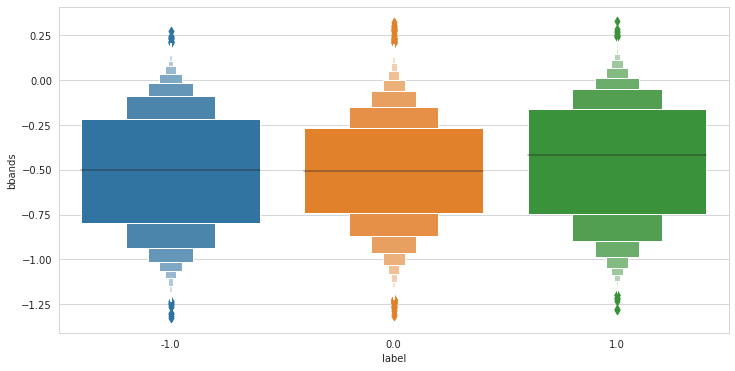

In [432]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands')

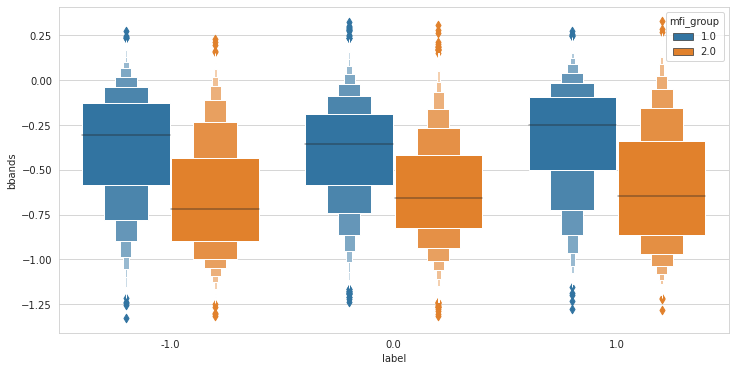

In [433]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands', hue = 'mfi_group')

#### Perfomance evaluation

In [434]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group']]
y = train['label'].astype('int')

In [435]:
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [436]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands  volume_group_2.0  volume_group_3.0  \
date       asset                                                             
2015-03-02 CCO.JO  -8.601468 -1.058853                 0                 1   
           CML.JO  12.816580 -0.260016                 0                 1   
           FFB.JO   9.717235 -0.773837                 1                 0   
           TCP.JO  -1.997219 -1.097198                 0                 0   
           TON.JO  38.190104  0.106009                 0                 0   
...                      ...       ...               ...               ...   
2017-12-22 SBK.JO   9.456337 -0.781312                 0                 1   
           SOL.JO  -5.487172 -0.373643                 0                 1   
           TWR.JO  -0.009033 -0.185444                 0                 0   
           VOD.JO   5.048420 -0.247161                 0                 1   
           WHL.JO -13.054819 -0.982370                 0                 1   

                   mfi_group_2.0  
date       asset                  
2015-03-02 CCO.JO              1  
           CML.JO              0  
           FFB.JO              0  
           TCP.JO              1  
           TON.JO              0  
...                          ...  
2017-12-22 SBK.JO              1  
           SOL.JO              0  
           TWR.JO              0  
           VOD.JO              0  
           WHL.JO              1  

[44606 rows x 5 columns]

In [437]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [438]:
true_y = convertToMultiClass(y)

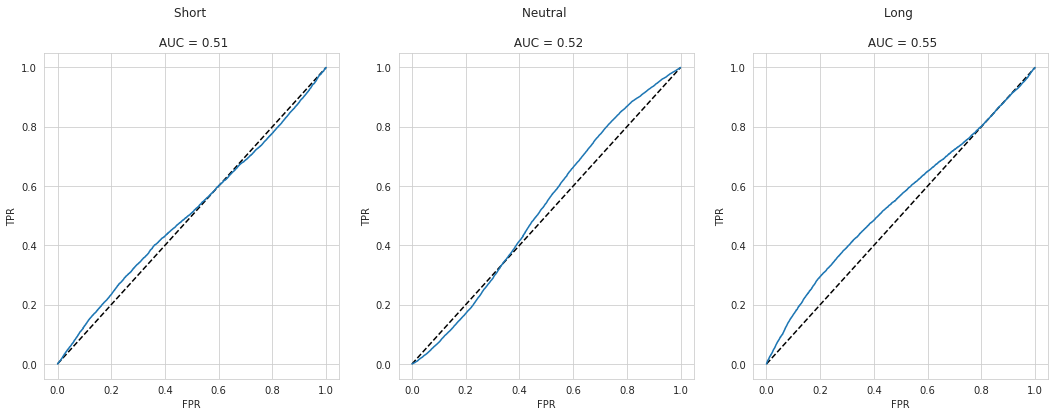

In [439]:
plotROC(true_y, probabilities)

### Residual Strength Index

In [440]:
%time
rsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 5
        rsi = ta.momentum.RSIIndicator(data['close'], n = n).rsi() * -1
        rsi.name = 'rsi'

        out = pd.DataFrame(rsi)
        out['symbol'] = symbol
        out.index.name = 'date'
        out = out.reset_index().set_index(['date', 'symbol'])
        
        volume = data['volume']
        
        # volume filter
        trailing_dollar_volume = getTrailingVolume(close, volume, symbol, n = 20)
        
        # price filter
        prices = getPricing(close, symbol)
        
        out = pd.concat([out, trailing_dollar_volume, prices], axis = 1)
        
        volume_mask = out['trailing_dollar_volume'] > minimum_dollar_volume
        price_mask = out['close'] > minimum_price
        out = out[volume_mask & price_mask][['rsi']]


        rsi_data = pd.concat([rsi_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [441]:
rsi_data

rsi
date       symbol            
2015-03-11 ABG.JO  -22.436281
2015-03-16 ABG.JO  -40.759181
2015-03-19 ABG.JO  -54.526045
2015-03-20 ABG.JO  -44.232366
2015-03-24 ABG.JO  -59.156786
...                       ...
2017-12-07 ZPLP.JO -56.428701
2017-12-14 ZPLP.JO -44.671217
2017-12-15 ZPLP.JO -56.103945
2017-12-18 ZPLP.JO -68.772640
2017-12-20 ZPLP.JO -74.201696

[45055 rows x 1 columns]

In [443]:
rsi_data = rsi_data.unstack().asfreq('C').stack()

In [444]:
rsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = rsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
rsi_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248 -90.796344              1.0
           CML.JO -0.013383  0.001368 -0.027547 -38.427365              3.0
           FFB.JO  0.024096  0.077108  0.101549 -73.088706              2.0
           TCP.JO  0.009783 -0.010870 -0.021739 -84.820078              1.0
           TON.JO -0.011037 -0.006689 -0.036856 -25.598648              3.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -60.082408              2.0
           SOL.JO  0.000000  0.000000  0.018144 -49.088000              3.0
           TWR.JO  0.000000  0.000000  0.037037 -36.970545              3.0
           VOD.JO  0.000000  0.000000  0.034020 -40.347338              3.0
           WHL.JO  0.000000  0.000000  0.035277 -75.524993              1.0

[44804 rows x 5 columns]

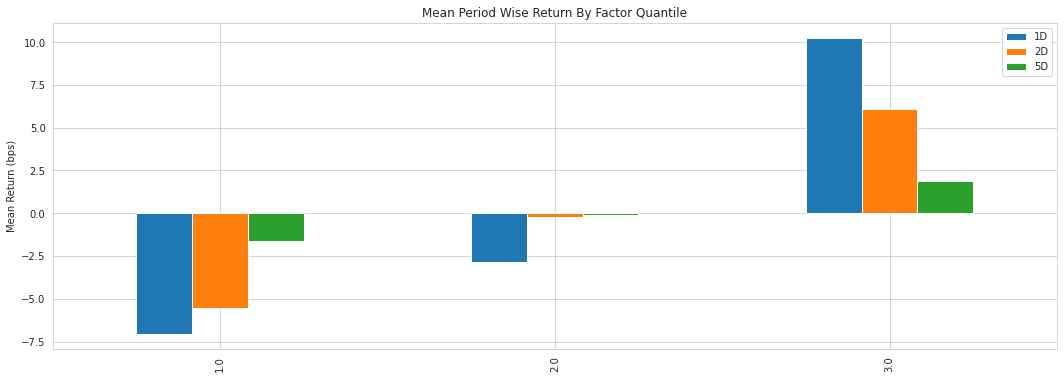

In [445]:
plotFactorQuantileBars(rsi_factor_data)

In [452]:
# plotCumulativeReturns(rsi_factor_data)

ValueError: Inferred frequency None from passed values does not conform to passed frequency C

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

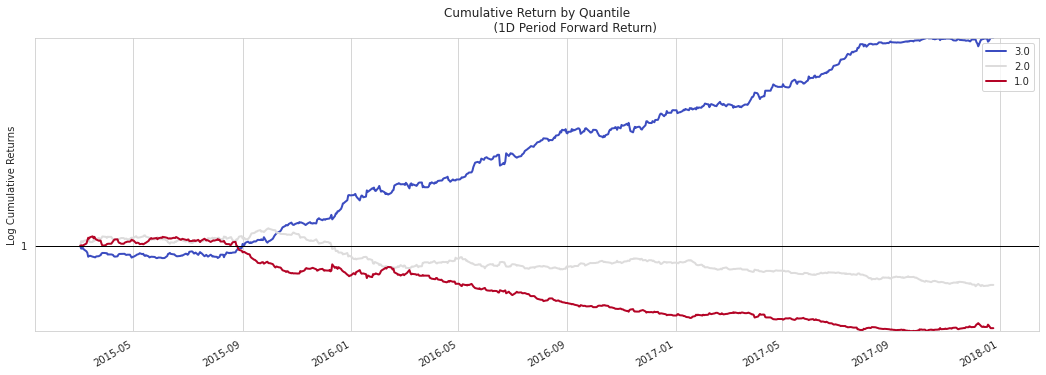

In [454]:
plotQuantileCumelativeReturns(rsi_factor_data)

In [455]:
rsi = rsi_factor_data['factor']
rsi.name = 'rsi'
train = pd.concat([train, rsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                         
2015-03-02 CCO.JO  -8.601468           3.0   -1.0 -1.058853        2.0   
           CML.JO  12.816580           3.0    0.0 -0.260016        1.0   
           FFB.JO   9.717235           2.0    1.0 -0.773837        1.0   
           TCP.JO  -1.997219           1.0    0.0 -1.097198        2.0   
           TON.JO  38.190104           1.0    1.0  0.106009        1.0   
...                      ...           ...    ...       ...        ...   
2017-12-22 SBK.JO   9.456337           3.0    0.0 -0.781312        2.0   
           SOL.JO  -5.487172           3.0    0.0 -0.373643        1.0   
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0   
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0   
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0   

                         rsi  
date       asset              
2015-03-02 CCO.JO -90.796344  
           CML.JO -38.427365  
           FFB.JO -73.088706  
           TCP.JO -84.820078  
           TON.JO -25.598648  
...                      ...  
2017-12-22 SBK.JO -59.763086  
           SOL.JO -49.088000  
           TWR.JO -36.970545  
           VOD.JO -40.347338  
           WHL.JO -75.524993  

[44606 rows x 6 columns]

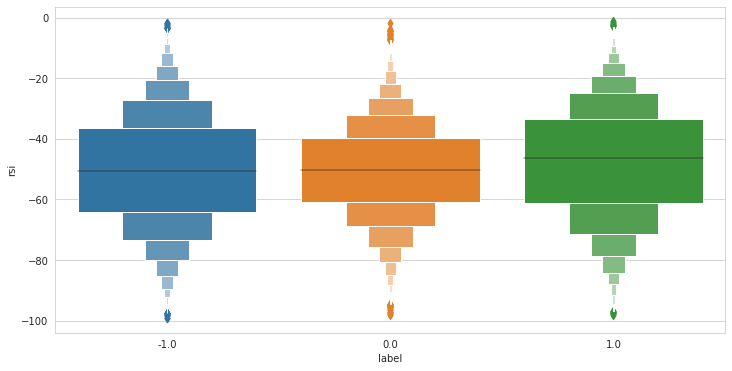

In [456]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'rsi')

In [457]:
%time
tsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        tsi = ta.momentum.TSIIndicator(data['close'], r = 9, s = 5).tsi() * -1
        tsi.name = 'tsi'

        out = pd.DataFrame(tsi)
        out['symbol'] = symbol
        out.index.name = 'date'
        out = out.reset_index().set_index(['date', 'symbol'])
        
        volume = data['volume']
        
        # volume filter
        trailing_dollar_volume = getTrailingVolume(close, volume, symbol, n = 20)
        
        # price filter
        prices = getPricing(close, symbol)
        
        out = pd.concat([out, trailing_dollar_volume, prices], axis = 1)
        
        volume_mask = out['trailing_dollar_volume'] > minimum_dollar_volume
        price_mask = out['close'] > minimum_price
        out = out[volume_mask & price_mask][['tsi']]

        tsi_data = pd.concat([tsi_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [458]:
tsi_data

tsi
date       symbol            
2015-03-11 ABG.JO   29.257540
2015-03-16 ABG.JO   25.232207
2015-03-19 ABG.JO   13.175551
2015-03-20 ABG.JO   12.392877
2015-03-24 ABG.JO    1.341426
...                       ...
2017-12-07 ZPLP.JO  -5.499087
2017-12-14 ZPLP.JO   0.176292
2017-12-15 ZPLP.JO  -4.120593
2017-12-18 ZPLP.JO -16.460770
2017-12-20 ZPLP.JO -27.611001

[45055 rows x 1 columns]

In [460]:
tsi_data = tsi_data.unstack().asfreq('C').stack()

In [461]:
tsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = tsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
tsi_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248 -62.498424              1.0
           CML.JO -0.013383  0.001368 -0.027547   5.920989              3.0
           FFB.JO  0.024096  0.077108  0.101549 -78.322781              1.0
           TCP.JO  0.009783 -0.010870 -0.021739 -48.253832              2.0
           TON.JO -0.011037 -0.006689 -0.036856  28.373896              3.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.006098 -10.826601              2.0
           SOL.JO  0.000000  0.000000  0.018144   9.183405              2.0
           TWR.JO  0.000000  0.000000  0.037037  23.836660              3.0
           VOD.JO  0.000000  0.000000  0.034020  12.929797              2.0
           WHL.JO  0.000000  0.000000  0.035277 -31.404694              1.0

[44804 rows x 5 columns]

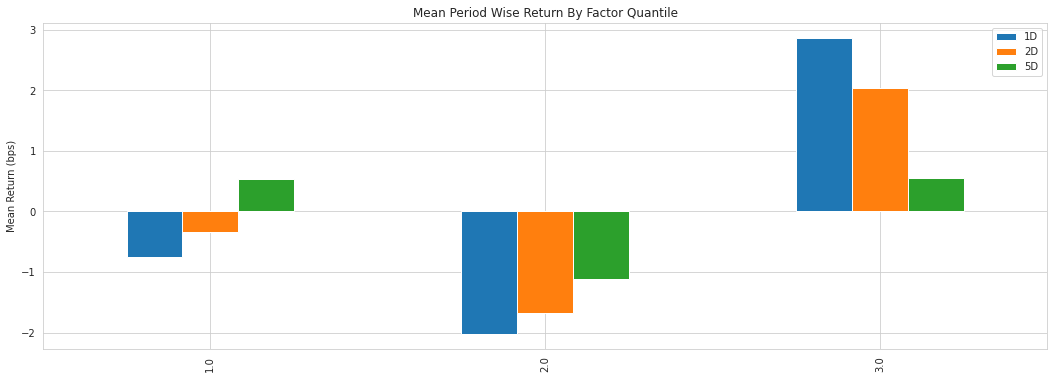

In [462]:
plotFactorQuantileBars(tsi_factor_data)

In [465]:
# plotCumulativeReturns(tsi_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

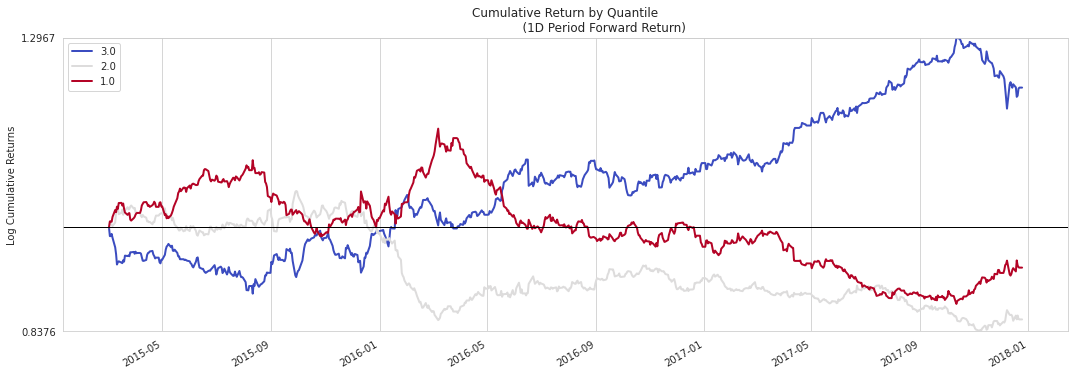

In [464]:
plotQuantileCumelativeReturns(tsi_factor_data)

In [466]:
tsi = tsi_factor_data['factor']
tsi.name = 'tsi'
train = pd.concat([train, tsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                         
2015-03-02 CCO.JO  -8.601468           3.0   -1.0 -1.058853        2.0   
           CML.JO  12.816580           3.0    0.0 -0.260016        1.0   
           FFB.JO   9.717235           2.0    1.0 -0.773837        1.0   
           TCP.JO  -1.997219           1.0    0.0 -1.097198        2.0   
           TON.JO  38.190104           1.0    1.0  0.106009        1.0   
...                      ...           ...    ...       ...        ...   
2017-12-22 SBK.JO   9.456337           3.0    0.0 -0.781312        2.0   
           SOL.JO  -5.487172           3.0    0.0 -0.373643        1.0   
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0   
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0   
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0   

                         rsi        tsi  
date       asset                         
2015-03-02 CCO.JO -90.796344 -62.498424  
           CML.JO -38.427365   5.920989  
           FFB.JO -73.088706 -78.322781  
           TCP.JO -84.820078 -48.253832  
           TON.JO -25.598648  28.373896  
...                      ...        ...  
2017-12-22 SBK.JO -59.763086 -37.025381  
           SOL.JO -49.088000   9.183405  
           TWR.JO -36.970545  23.836660  
           VOD.JO -40.347338  12.929797  
           WHL.JO -75.524993 -31.404694  

[44606 rows x 7 columns]

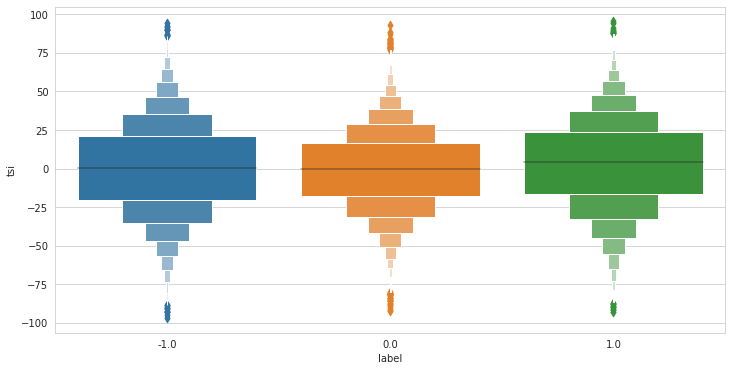

In [467]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'tsi')

#### Perfomance evaluation

In [468]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group', 'rsi', 'tsi']]
y = train['label'].astype('int')
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [469]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands        rsi        tsi  \
date       asset                                               
2015-03-02 CCO.JO  -8.601468 -1.058853 -90.796344 -62.498424   
           CML.JO  12.816580 -0.260016 -38.427365   5.920989   
           FFB.JO   9.717235 -0.773837 -73.088706 -78.322781   
           TCP.JO  -1.997219 -1.097198 -84.820078 -48.253832   
           TON.JO  38.190104  0.106009 -25.598648  28.373896   
...                      ...       ...        ...        ...   
2017-12-22 SBK.JO   9.456337 -0.781312 -59.763086 -37.025381   
           SOL.JO  -5.487172 -0.373643 -49.088000   9.183405   
           TWR.JO  -0.009033 -0.185444 -36.970545  23.836660   
           VOD.JO   5.048420 -0.247161 -40.347338  12.929797   
           WHL.JO -13.054819 -0.982370 -75.524993 -31.404694   

                   volume_group_2.0  volume_group_3.0  mfi_group_2.0  
date       asset                                                      
2015-03-02 CCO.JO                 0                 1              1  
           CML.JO                 0                 1              0  
           FFB.JO                 1                 0              0  
           TCP.JO                 0                 0              1  
           TON.JO                 0                 0              0  
...                             ...               ...            ...  
2017-12-22 SBK.JO                 0                 1              1  
           SOL.JO                 0                 1              0  
           TWR.JO                 0                 0              0  
           VOD.JO                 0                 1              0  
           WHL.JO                 0                 1              1  

[44606 rows x 7 columns]

In [470]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y,
    cv = 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [471]:
true_y = convertToMultiClass(y)

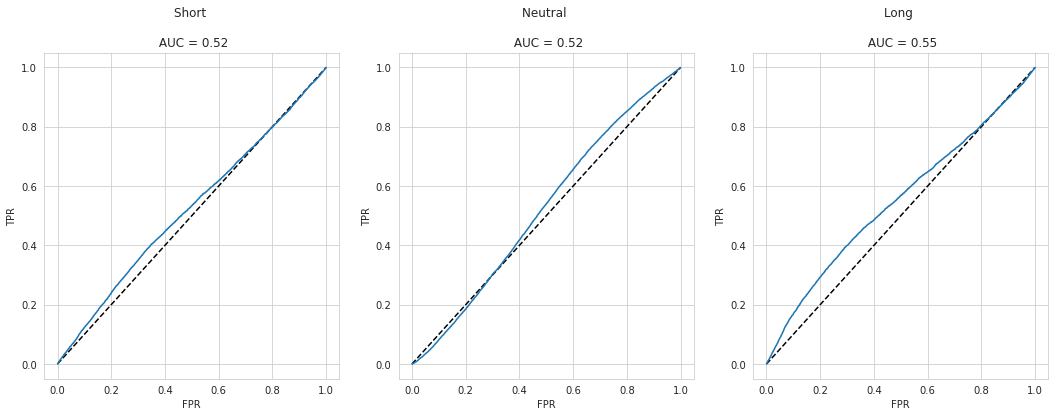

In [472]:
plotROC(true_y, probabilities)

## Alpha Combination

In [473]:
def modelFit(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    kf = KFold(n_splits = cv)
    for train_index, test_index in kf.split(X, y):

        train_X = X.iloc[train_index, ]
        train_y = y.iloc[train_index]

        test_X = X.iloc[test_index, ]
        test_y = y.iloc[test_index]

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']

        model = clf
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = pd.DataFrame(
            model.predict_proba(test_X), 
            columns = model.classes_, 
            index = test_X.index)

        probabilities = pd.concat(
            [probabilities, probs])
        
        preds = pd.DataFrame(
            model.predict(test_X), 
            columns = ['predictions'], 
            index = test_X.index)
        preds['actual'] = test_y

        predictions = pd.concat(
            [predictions, preds])

    return predictions, probabilities

In [474]:
clf = LogisticRegression()
predictions, probabilities = modelFit(clf, X, y, cv = 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [475]:
predictions

predictions  actual
date       asset                      
2015-03-02 CCO.JO            0      -1
           CML.JO            1       0
           FFB.JO            0       1
           TCP.JO            0       0
           TON.JO            1       1
...                        ...     ...
2017-12-22 SBK.JO            0       0
           SOL.JO           -1       0
           TWR.JO            1       1
           VOD.JO            1       0
           WHL.JO           -1       0

[44606 rows x 2 columns]

In [477]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

          -1       0.22      0.33      0.26      9299
           0       0.61      0.27      0.38     26108
           1       0.24      0.49      0.32      9199

    accuracy                           0.33     44606
   macro avg       0.36      0.36      0.32     44606
weighted avg       0.45      0.33      0.34     44606



In [478]:
predictions

predictions  actual
date       asset                      
2015-03-02 CCO.JO            0      -1
           CML.JO            1       0
           FFB.JO            0       1
           TCP.JO            0       0
           TON.JO            1       1
...                        ...     ...
2017-12-22 SBK.JO            0       0
           SOL.JO           -1       0
           TWR.JO            1       1
           VOD.JO            1       0
           WHL.JO           -1       0

[44606 rows x 2 columns]

In [479]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

date        asset 
2015-03-02  CCO.JO    2
            CML.JO    3
            FFB.JO    2
            TCP.JO    2
            TON.JO    3
                     ..
2017-12-22  SBK.JO    2
            SOL.JO    1
            TWR.JO    3
            VOD.JO    3
            WHL.JO    1
Name: factor_quantile, Length: 44606, dtype: int64

In [480]:
probabilities

-1         0         1
date       asset                               
2015-03-02 CCO.JO  0.353245  0.378134  0.268621
           CML.JO  0.306999  0.329179  0.363822
           FFB.JO  0.279532  0.369389  0.351079
           TCP.JO  0.365230  0.376004  0.258766
           TON.JO  0.287065  0.308265  0.404670
...                     ...       ...       ...
2017-12-22 SBK.JO  0.318086  0.365206  0.316708
           SOL.JO  0.341341  0.327378  0.331281
           TWR.JO  0.323431  0.320948  0.355622
           VOD.JO  0.320127  0.323162  0.356711
           WHL.JO  0.372900  0.360325  0.266776

[44606 rows x 3 columns]

In [481]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'

In [482]:
factor = pd.DataFrame(probs)
factor

factor
date       asset           
2015-03-02 CCO.JO  0.268621
           CML.JO  0.363822
           FFB.JO  0.351079
           TCP.JO  0.258766
           TON.JO  0.404670
...                     ...
2017-12-22 SBK.JO  0.316708
           SOL.JO  0.331281
           TWR.JO  0.355622
           VOD.JO  0.356711
           WHL.JO  0.266776

[44606 rows x 1 columns]

In [483]:
factor = factor.unstack().asfreq('C').stack()
factor.index.levels[0].freq

<CustomBusinessDay>

In [484]:
forward_returns = alphalens.utils.compute_forward_returns(
    factor = factor,
    prices = prices_data,
    periods = [1, 2, 5]
)
forward_returns

1D        2D        5D
date       asset                                
2015-03-02 ABG.JO  -0.032808 -0.018373 -0.066089
           ABSP.JO  0.012658  0.012658  0.022785
           ACG.JO   0.017472  0.007194  0.012333
           ACL.JO  -0.010832 -0.005416 -0.106770
           ACT.JO   0.026119  0.063433  0.097015
...                      ...       ...       ...
2017-12-22 VOD.JO   0.000000  0.000000  0.034020
           WHL.JO   0.000000  0.000000  0.035277
           WSL.JO   0.000000  0.000000  0.012121
           ZED.JO   0.000000  0.000000  0.028316
           ZPLP.JO  0.000000  0.000000 -0.002346

[173460 rows x 3 columns]

In [485]:
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data

1D        2D        5D    factor  factor_quantile
date       asset                                                          
2015-03-02 CCO.JO -0.002685 -0.006711 -0.027248  0.268621              2.0
           CML.JO -0.013383  0.001368 -0.027547  0.363822              3.0
           FFB.JO  0.024096  0.077108  0.101549  0.351079              2.0
           TCP.JO  0.009783 -0.010870 -0.021739  0.258766              2.0
           TON.JO -0.011037 -0.006689 -0.036856  0.404670              3.0
...                     ...       ...       ...       ...              ...
2017-12-22 SBK.JO  0.000000  0.000000  0.045025  0.316708              2.0
           SOL.JO  0.000000  0.000000  0.018144  0.331281              1.0
           TWR.JO  0.000000  0.000000  0.037037  0.355622              3.0
           VOD.JO  0.000000  0.000000  0.034020  0.356711              3.0
           WHL.JO  0.000000  0.000000  0.035277  0.266776              1.0

[44606 rows x 5 columns]

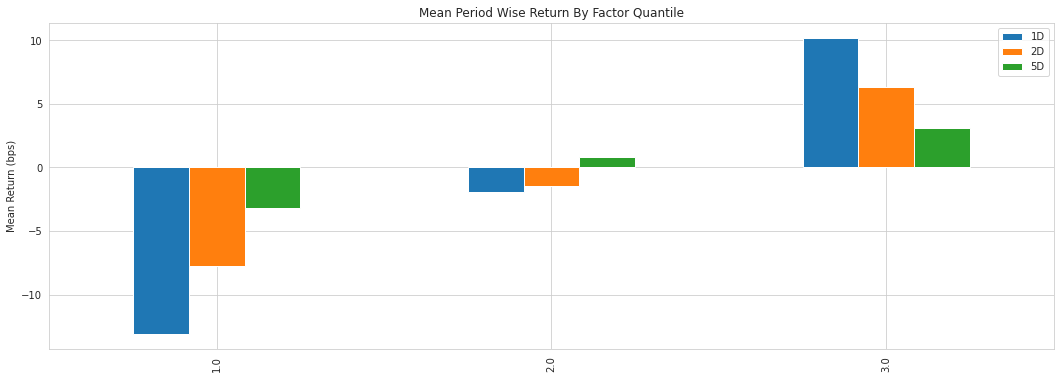

In [486]:
plotFactorQuantileBars(clf_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

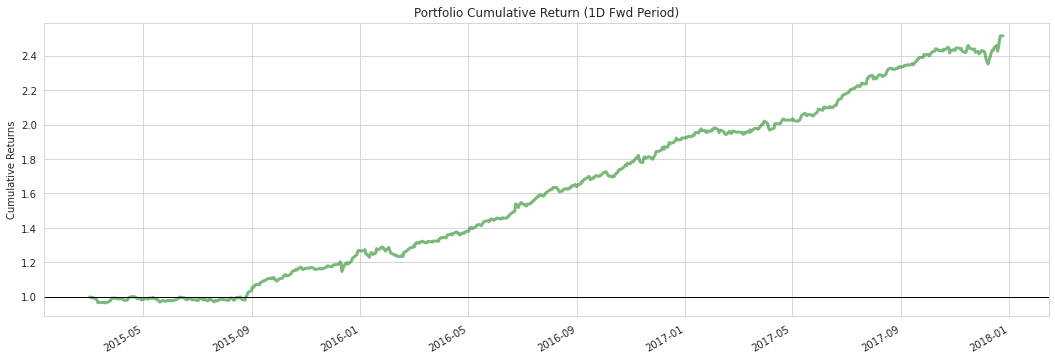

In [488]:
plotCumulativeReturns(clf_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

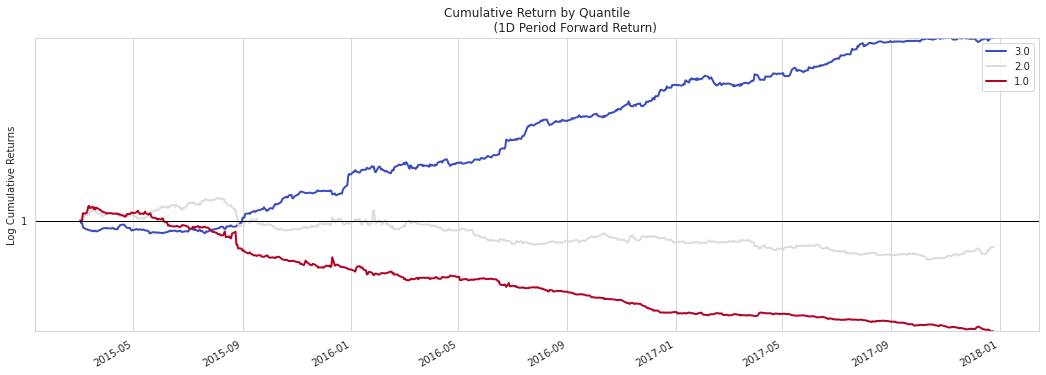

In [489]:
plotQuantileCumelativeReturns(clf_factor_data)

In [490]:
pyfolio_input = alphalens.performance.create_pyfolio_input(clf_factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


In [491]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

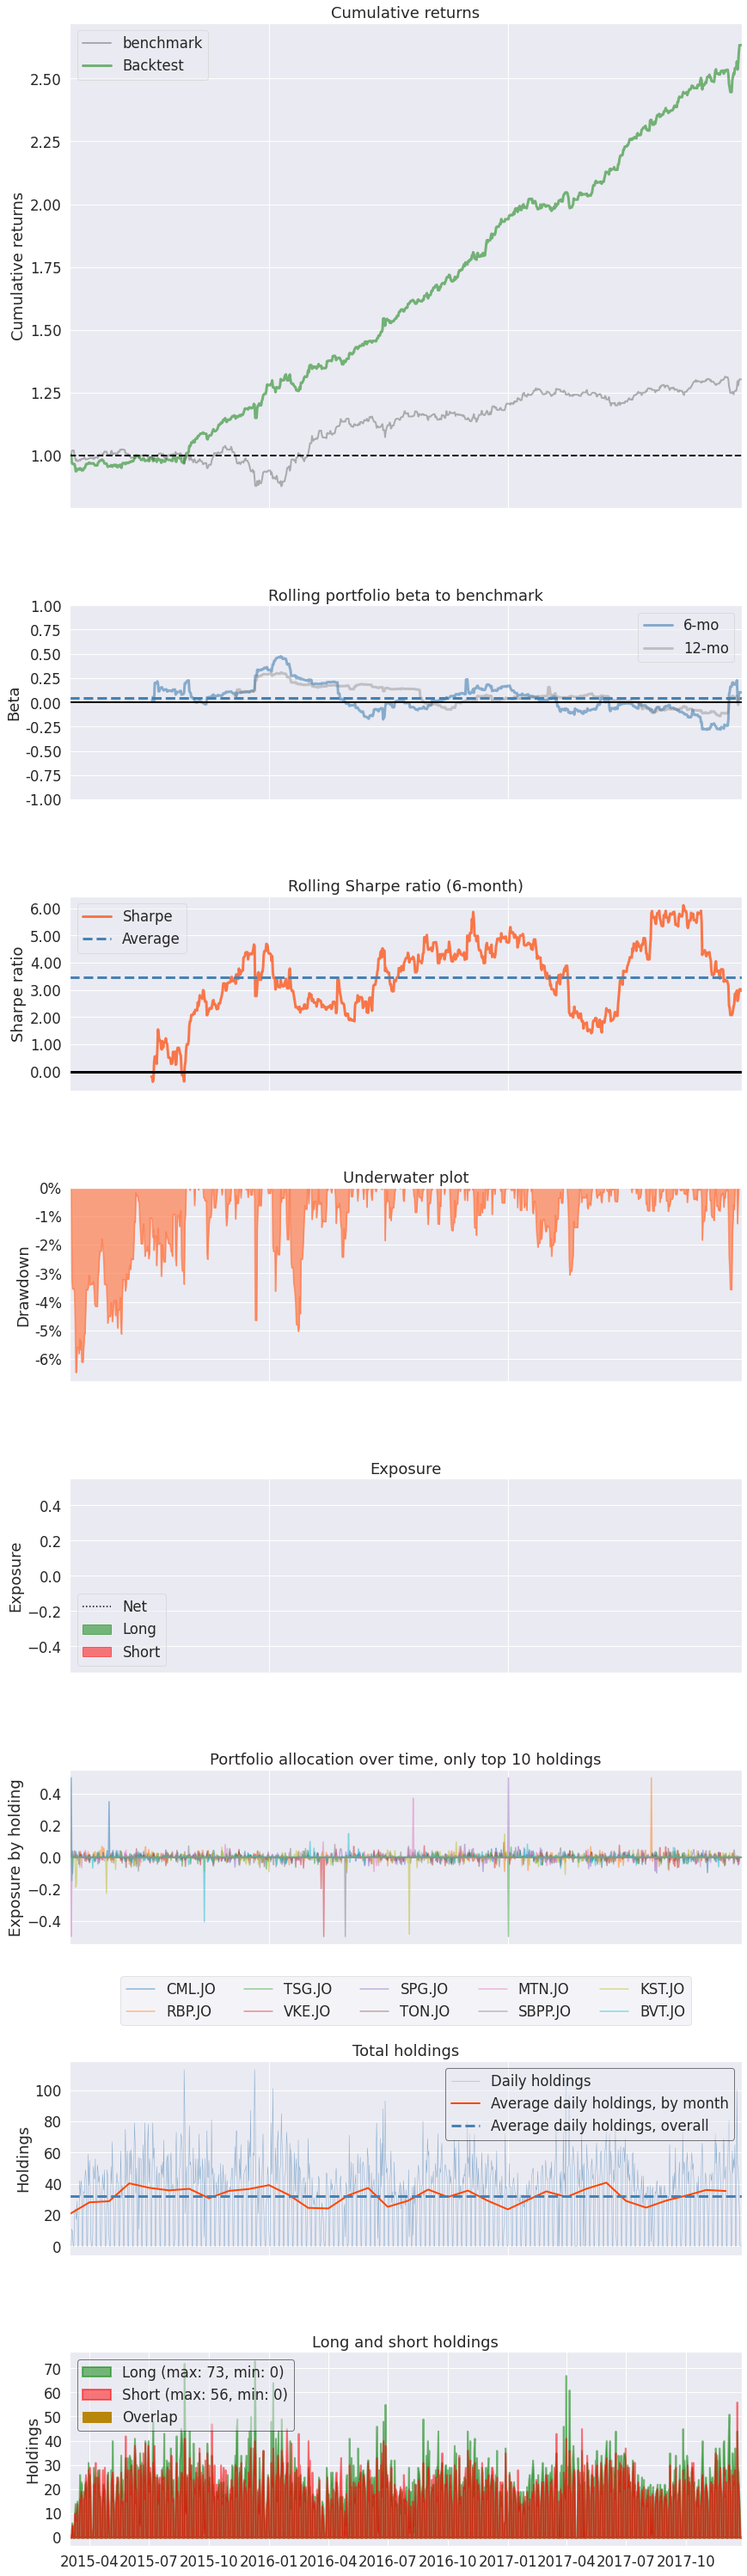

In [492]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

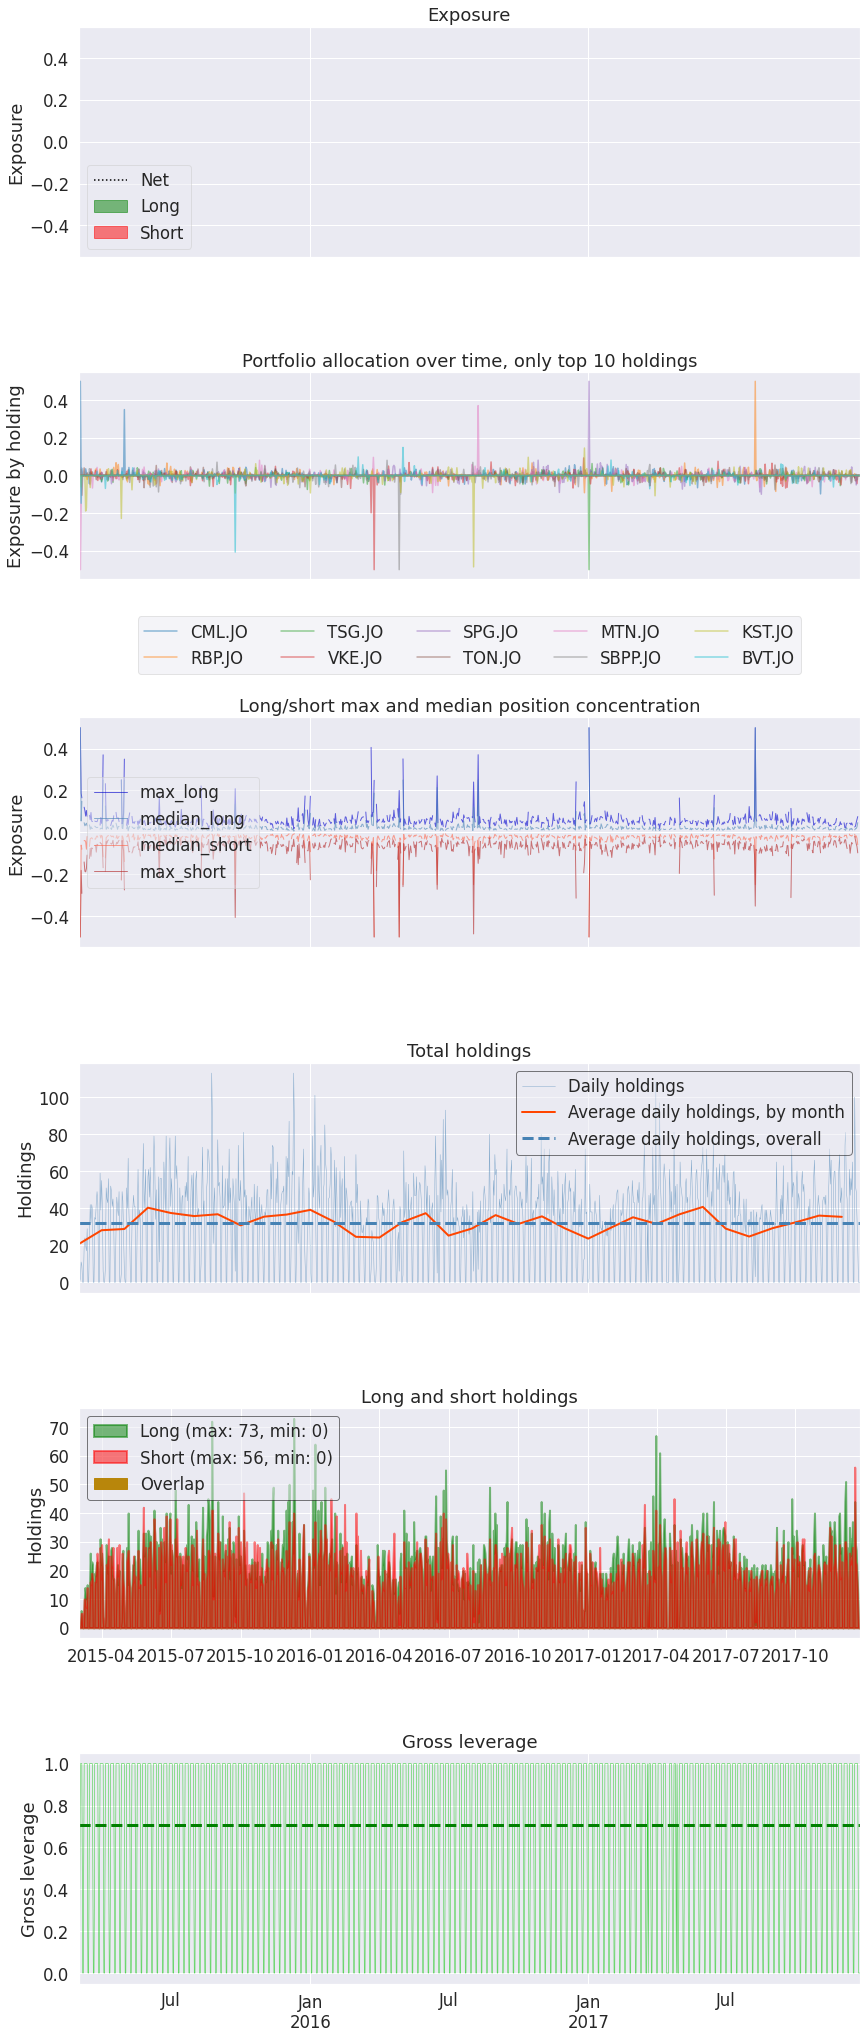

In [493]:
pyfolio.create_position_tear_sheet(returns, positions)

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

In [ ]:
# wf_start_date = macd_data.dropna().reset_index().sort_values('date')['date'][0]
wf_start_date = datetime(2016, 3, 1)
wf_start_date

In [ ]:
training_window = 66
testing_window = 22

In [ ]:
def getPrices(data, start_date, training_window = None, test = False, testing_window = None):
    prices = data.loc[start_date: ].copy()
    if not test:
        prices_df = prices.iloc[:training_window]
    else:
        prices_df = prices.iloc[training_window:training_window + testing_window]
    prices_df.index = pd.to_datetime(prices_df.index)
    return prices_df

In [ ]:
train_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window)
test_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window, test = True, testing_window=testing_window)

In [ ]:
def getFactor(indicator, date_range):
    
    factor = indicator.reset_index()
    factor_filtered = factor[factor['date'].isin(date_range)].set_index(['date', 'asset'])
    return factor_filtered

In [ ]:
macd_data_train = getFactor(indicator = macd_data, date_range = train_prices.index)
volume_data_train = getFactor(indicator = volume_data, date_range = train_prices.index)

macd_data_test = getFactor(indicator = macd_data, date_range = test_prices.index)
volume_data_test = getFactor(indicator = volume_data, date_range = test_prices.index)

In [ ]:
def getCleanFactorData(factor, prices, quantiles = 3):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
        factor = factor, 
        prices = prices, 
        quantiles = quantiles, 
        max_loss = 0.75)
    return factor_data

In [ ]:
macd_factor_data_train = getCleanFactorData(factor = macd_data_train, prices = train_prices, quantiles = 3)
volume_factor_data_train = getCleanFactorData(factor = volume_data_train, prices = train_prices, quantiles = 3)

macd_factor_data_test = getCleanFactorData(factor = macd_data_test, prices = test_prices, quantiles = 3)
volume_factor_data_test = getCleanFactorData(factor = volume_data_test, prices = test_prices, quantiles = 3)

In [ ]:
def getData(macd_factor_data, volume_factor_data):
    macd_sig = macd_factor_data['factor']
    macd_sig.name = 'macd_sig'

    volume_bins = volume_factor_data['factor_quantile']
    volume_bins.name = 'volume_bins'

    target = macd_factor_data['1D']
    target.name = 'target'

    data = pd.concat([macd_sig, volume_bins, target], axis = 1)
    return data

In [ ]:
train = getData(macd_factor_data_train, volume_factor_data_train)
test = getData(macd_factor_data_test, volume_factor_data_test)

In [ ]:
train.head()

In [ ]:
train['target2']

In [ ]:
pd.qcut(train['target'], q = 3, labels = ['short', 'nothing', 'long'], duplicates = 'drop').value_counts().sum() #

In [ ]:
X_train = train[['macd_sig', 'volume_bins']]
y_train = train['target']

X_test = test[['macd_sig', 'volume_bins']]
y_test = test['target']

# Backtesting and Trading Simulation

# Summary and Conclusions